# Phase diagram with general parameters
For $(\rho_S, p_S)$ equations, ignoring the translational difussion, the dynamics of fluctuations with respect to the
homogenous phase is governed by
$$\partial_t \delta f = q J \delta f,$$
where the matrix $J$ reads
$$ J=
\begin{pmatrix}
        0 & 0 & -i \bar{v}_A & 0 \\
        0 & 0 & 0 & -i \bar{v}_B \\
        -i\nu_{AA}/\bar{v}_A & -i\nu_{AB}/\bar{v}_A & -\gamma_A &0 \\
        -i\nu_{BA}/\bar{v}_B & -i\nu_{BB}/\bar{v}_B & 0 & -\gamma_B
    \end{pmatrix},
$$
and
$$
    \begin{align*}
    \nu_{SS'}(q)&\equiv\frac{\bar{v}_S^2}{2}(\delta_{S,S'}+\omega_{SS'}(1-q^2\ell^2)),\\
    \gamma_S(q)&\equiv\frac{D_{r,S}}{q}+\frac{\bar{v}_S^2 q}{16D_{r,S}}.
    \end{align*}
$$
Denoting the eigenvalues of $J$ as $\lambda$, which are roots of $|J-\lambda I|=0$,
with
$$
|J-\lambda I| = a_0\lambda^4 + a_1\lambda^3 + a_2\lambda^2 + a_3\lambda + a_4,
$$
where
$$
    \begin{aligned}
    a_0 &= 1, \\
    a_1 &= \gamma_A + \gamma_B,\\
    a_2 &= \gamma_A \gamma_B + \nu_{AA} + \nu_{BB},\\
    a_3 &= \gamma_A \nu_{BB} + \gamma_B \nu_{AA},\\
    a_4 &= \nu_{AA}\nu_{BB} - \nu_{AB}\nu_{BA}.
    \end{aligned}
$$

The necessary condition for $\Re(\lambda(q))<0$ is $a_i>0$, while the necessary and sufficient condition is $\Delta_i > 0$ for $i=1, 2, 3, 4$, where
$$
    \begin{aligned}
    \Delta_1 &= a_1,\\
    \Delta_2 &= \left|\begin{matrix}
        a_1 & a_0 \\
        a_3 & a_2
    \end{matrix}\right| = a_1 a_2 - a_0 a_3, \\
    \Delta_3 &= \left|\begin{matrix}
        a_1 & a_0 & 0\\
        a_3 & a_2 & a_1 \\
        0 & a_4 & a_3
    \end{matrix}\right| = a_3\Delta_2 - a_1^2 a_4 = a_1 a_2 a_3 -a_1^2 a_4 - a_0 a_3^2, \\
    \Delta_4 &= \left|\begin{matrix}
        a_1 & a_0 & 0 & 0\\
        a_3 & a_2 & a_1 & a_0\\
        0 & a_4 & a_3 & a_2 \\
        0 & 0 & 0 & a_4
    \end{matrix}\right| = a_4 \Delta_3.
    \end{aligned}
$$
Therefore, to get the condition of instabilities, we need konw the sign of
$$
\begin{aligned}
    a_1 &= \gamma_A + \gamma_B, \\
    a_2 &= \gamma_A \gamma_B + \nu_{AA} + \nu_{BB}, \\
    a_3 &= \gamma_A \nu_{BB} + \gamma_B \nu_{AA}, \\
    a_4 &= \nu_{AA}\nu_{BB} - \nu_{AB}\nu_{BA}, \\
    \Delta_2 &= a_1 a_2 - a_3 \\ 
     &=(\gamma_A+\gamma_B)\gamma_A\gamma_B + \gamma_A\nu_{AA} + \gamma_B\nu_{BB},\\
    \Delta_3 &= a_3\Delta_2 - a_1^2 a_4 \\
             &=(\gamma_A\nu_{BB}+\gamma_B\nu_{AA})(\gamma_A+\gamma_B)\gamma_A\gamma_B + \gamma_A\gamma_B (\nu_{AA}-\nu_{BB})^2 + (\gamma_A+\gamma_B)^2\nu_{AB}\nu_{BA},
    \end{aligned}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
import os


def get_a1(gamma_A, gamma_B):
    return gamma_A + gamma_B

def get_a2(gamma_A, gamma_B, nu_AA, nu_BB):
    return gamma_A * gamma_B + nu_AA + nu_BB

def get_a3(gamma_A, gamma_B, nu_AA, nu_BB):
    return gamma_A * nu_BB + gamma_B * nu_AA

def get_a4(nu_AA, nu_BB, nu_AB_BA):
    return nu_AA * nu_BB - nu_AB_BA

def get_Delta2(gamma_A, gamma_B, nu_AA, nu_BB):
    a1 = get_a1(gamma_A, gamma_B)
    a2 = get_a2(gamma_A, gamma_B, nu_AA, nu_BB)
    a3 = get_a3(gamma_A, gamma_B, nu_AA, nu_BB)
    return a1 * a2 - a3

def get_Delta3(gamma_A, gamma_B, nu_AA, nu_BB, nu_AB_BA):
    a1 = get_a1(gamma_A, gamma_B)
    a2 = get_a2(gamma_A, gamma_B, nu_AA, nu_BB)
    a3 = get_a3(gamma_A, gamma_B, nu_AA, nu_BB)
    a4 = get_a4(nu_AA, nu_BB, nu_AB_BA)
    Delta2 = a1 * a2 - a3
    return a3 * Delta2 - a1**2 * a4

Note that $a_i$ and $\Delta_i$ depend on $\gamma_{A,B}, \nu_{SS'}$. By introducing six dimensionless parameters
$$
\begin{aligned}
        \sigma_D &\equiv \frac{D_{r,A}}{D_{r,B}}, \\
        \sigma_v&\equiv \bar{v}_A/\bar{v}_B, \\
        \mathrm{Pe} &\equiv \frac{\bar{v}_B}{D_{r,B}}, \\
        \omega_1 &\equiv  1 + \omega_{AA}, \\
        \omega_2 &\equiv  1 + \omega_{BB}, \\
        \omega_c &\equiv  \omega_{AB} \omega_{BA}.    
\end{aligned}
$$,
we get
$$
    \begin{aligned}
        \gamma_A &= \frac{D_{r,A}}{q} + \frac{\bar{v}_A^2 q}{16 D_{r,A}} = D_{r, B} \left(\frac{\sigma_D}{q} + \frac{\mathrm{Pe}^2\sigma_v^2}{16\sigma_D}q\right), \\
        \gamma_B &= \frac{D_{r,B}}{q} + \frac{\bar{v}_B^2 q}{16 D_{r,B}} = D_{r, B} \left(\frac{1}{q} + \frac{\mathrm{Pe}^2}{16}q\right), \\
        \nu_{AA} &= \frac{\bar{v}^2_A}{2}\left(1+  \omega_{AA} (1-\ell^2 q^2) \right)
                  = \frac{D_{r,B}^2 \mathrm{Pe}^2 \sigma_v^2}{2}\left(1+  (\omega_1 -1) (1-\ell^2 q^2) \right),\\
        \nu_{BB} &= \frac{\bar{v}^2_B}{2}\left(1+  \omega_{BB} (1-\ell^2 q^2) \right)
                 =\frac{D_{r,B}^2\mathrm{Pe}^2}{2}\left(1+  (\omega_2-1) (1-\ell^2 q^2) \right),\\
        \nu_{AB}\nu_{BA} & = \frac{\bar{v}_A^2\bar{v}_B^2}{4}\omega_{AB}\omega_{BA} (1-\ell^2q^2)^2
                      =\frac{D_{r,B}^4\mathrm{Pe}^4\sigma_v^2}{4}\omega_c (1-\ell^2q^2)^2.
    \end{aligned}
$$

In [2]:
def get_gamma_nu(sigma_D, sigma_v, Pe, w1, w2, wc, q, ll=3./20, simple_gamma=False):
    if simple_gamma:
        gamma_A = sigma_D / q
        gamma_B = 1 / q
    else:
        gamma_A = sigma_D / q + (Pe * sigma_v) ** 2 / (16 * sigma_D) * q
        gamma_B = 1 / q + Pe ** 2 / 16 * q
    nu_AA = 0.5 * (Pe * sigma_v)**2 * (1 + (w1-1) * (1-ll*q**2))
    nu_BB = 0.5 * Pe**2 * (1 + (w2-1) * (1-ll*q**2))
    nu_AB_BA = 0.25 * Pe**4 * sigma_v**2 * wc * (1-ll*q**2)**2
    return gamma_A, gamma_B, nu_AA, nu_BB, nu_AB_BA

def get_gamma(sigma_D, sigma_v, Pe, q, simple_gamma=False):
    if simple_gamma:
        gamma_A = sigma_D / q
        gamma_B = 1 / q
    else:
        gamma_A = sigma_D / q + (Pe * sigma_v) ** 2 / (16 * sigma_D) * q
        gamma_B = 1 / q + Pe ** 2 / 16 * q
    return gamma_A, gamma_B

def get_nu(sigma_v, Pe, w1, w2, wc, q, ll=3./20):
    nu_AA = 0.5 * (Pe * sigma_v)**2 * (1 + (w1-1)*(1-ll*q**2))
    nu_BB = 0.5 * Pe**2 * (1 + (w2-1)*(1-ll*q**2))
    nu_AB_BA = 0.25 * Pe**4 * sigma_v**2 * wc * (1-ll*q**2)**2
    return nu_AA, nu_BB, nu_AB_BA



## Condition for instabilities

As $q\to 0$, the sign of $\Delta_3$ is the same as the sign of $a_3$. There will be long-wave instabilities if
$$
a_3(q=0) < 0 \quad \mathrm{or} \quad a_4(q=0) < 0,
$$
otherwise the system is homogenous at long-wave limits, but may have short-wave stationary instabilities if
$a_4(q) < 0$ for some $q>q_s$, or short-wave oscillatory instabilities if $\Delta_3(q) < 0$ for some $q>q_o$.


In [3]:
def find_long_instabi(sigma_D, sigma_v, Pe, w1, w2, wc, q0=1e-4, ll=3./20, simple_gamma=False):
    gamma_A, gamma_B, nu_AA, nu_BB, nu_AB_BA = get_gamma_nu(sigma_D, sigma_v, Pe, w1, w2, wc, q0, ll=ll, simple_gamma=simple_gamma)
    # a3 = get_a3(gamma_A, gamma_B, nu_AA, nu_BB)
    a4 = get_a4(nu_AA, nu_BB, nu_AB_BA)
    Delta_2 = get_Delta2(gamma_A, gamma_B, nu_AA, nu_BB)
    Delta_3 = get_Delta3(gamma_A, gamma_B, nu_AA, nu_BB, nu_AB_BA)
    # long-wave instabilities
    mask_LI = np.logical_or(a4 <= 0, np.logical_or(Delta_2 <= 0, Delta_3 <= 0))
    # long-wave stabilities
    mask_LS = np.logical_and(a4 > 0, np.logical_and(Delta_2 > 0, Delta_3 > 0))
    sigma_0 = sigma_D / sigma_v ** 2
    mask_LOI = np.logical_and(mask_LI, (w1-sigma_0 * w2)**2 < 4*(-sigma_0 * wc))
    mask_LSI = np.logical_and(mask_LI, (w1-sigma_0 * w2)**2 >= 4*(-sigma_0 * wc))
    return mask_LS, mask_LOI, mask_LSI

def find_first_zero(f_arr, q_arr):
    for i, q in enumerate(q_arr):
        if f_arr[i] < 0:
            return q
    return 0

def find_first_zeros(a4, Delta3, q_arr):
    q0_a4, q0_Delta3 = 0, 0
    for i, q in enumerate(q_arr):
        if a4[i] < 0 and Delta3[i] > 0:
            q0_a4 = q
            break
        elif a4[i] > 0 and Delta3[i] < 0:
            q0_Delta3 = q
            break
        elif a4[i] < 0 and Delta3[i] < 0:
            q0_a4 = q
            q0_Delta3 = q
            break
    return q0_a4, q0_Delta3


def find_short_instabi(sigma_D, sigma_v, Pe, w1, w2, wc, qmin=1e-4, qmax=np.sqrt(20/3), Nq=100, ll=3./20, simple_gamma=False):
    q_arr = np.linspace(qmin, qmax, Nq, endpoint=False)
    gamma_A_q, gamma_B_q, nu_AA_q, nu_BB_q, nu_AB_BA_q = get_gamma_nu(
        sigma_D, sigma_v, Pe, w1, w2, wc, q_arr, ll=ll, simple_gamma=simple_gamma)
    a4_q = get_a4(nu_AA_q, nu_BB_q, nu_AB_BA_q)
    Delta3_q = get_Delta3(gamma_A_q, gamma_B_q, nu_AA_q, nu_BB_q, nu_AB_BA_q)
    q0_a4, q0_D3 = 0., 0.
    if np.min(a4_q) < 0 or np.min(Delta3_q) < 0:
        q0_a4, q0_D3 = find_first_zeros(a4_q, Delta3_q, q_arr)
    return q0_a4, q0_D3

def find_contours(state):
    contours = {}
    contours["LWS"] = measure.find_contours(state==1)
    contours["LWO"] = measure.find_contours(state==2)
    contours["SWS"] = measure.find_contours(state==3)
    contours["SWO"] = measure.find_contours(state==4)
    return contours

## Phase diagram on $(\omega_1, \omega_2)$ plane

Phase diagram on $(\omega_1=1+\omega_{AA}, \omega_2=1+\omega_{BB})$ plane with given $\omega_c=\omega_{AB}\omega_{BA}$, $\sigma_D$, $\sigma_v$ and $\mathrm{Pe}$.

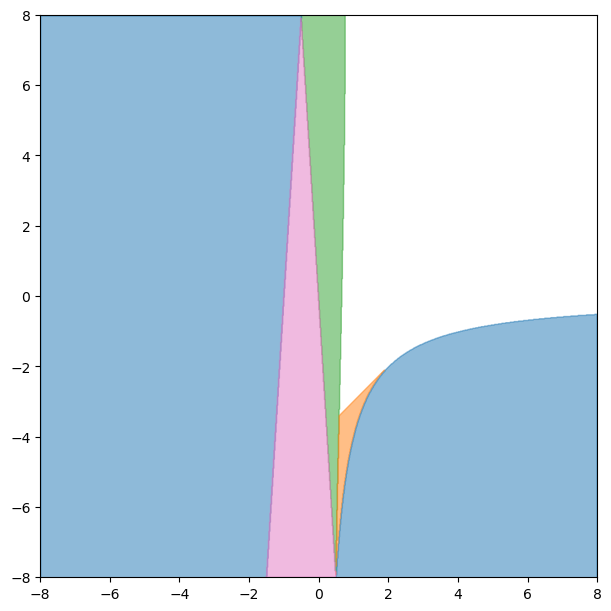

In [4]:
def get_PD_w1_w2_data(sigma_D, sigma_v, Pe, wc, extent=[-8, 8, -8, 8],
                      qmin=1e-5, qmax=1, Nq=200, resolution=1000, overwrite=False):
    fout = "data/PD_w1_w2/sD%g_sv%g_Pe%g_wc%g_qm%g_r%g.npz" % (
            sigma_D, sigma_v, Pe, wc, qmax, resolution
        )
    if not overwrite and os.path.exists(fout):
        with np.load(fout, "rb") as data:
            return data["extent"], data["state"], data["q_range"]
    else:
        nrows, ncols = resolution, resolution
        w1, w2 = np.meshgrid(
            np.linspace(extent[0], extent[1], ncols),
            np.linspace(extent[2], extent[3], nrows)
        )
        mask_LS, mask_LOI, mask_LSI = find_long_instabi(sigma_D, sigma_v, Pe, w1, w2, wc)
        q0_a4, q0_Delta3 = np.zeros((2, nrows, ncols))
        for row in range(nrows):
                for col in range(ncols):
                    if mask_LS[row, col]:
                        q0_a4[row, col], q0_Delta3[row, col] = find_short_instabi(
                            sigma_D, sigma_v, Pe, w1[row, col], w2[row, col], wc)
        state = np.zeros((nrows, ncols), np.byte)
        state[mask_LSI] = 1
        state[mask_LOI] = 2
        state[q0_a4 > 0] = 3
        state[q0_Delta3 > 0] = 4
        q_range = np.array([qmin, qmax, Nq])
        np.savez_compressed(fout, extent=extent, state=state, q_range=q_range)
        return extent, state, q_range


def plot_PD_w1_w2(state, extent, xlim=None, ylim=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(6, 6), sharex=True, sharey=True, constrained_layout=True)
        flag_show = True
    else:
        flag_show = False

    nrows, ncols = state.shape
    # ax.imshow(state, origin="lower", extent=extent)
    contours = find_contours(state)

    for contour in contours["SWO"]:
        x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
        y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]
        ax.fill(x, y, c="tab:green", alpha=0.5)
    
    for contour in contours["SWS"]:
        x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
        y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]
        ax.fill(x, y, c="tab:orange", alpha=0.5)

    for contour in contours["LWS"]:
        x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
        y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]
        # ax.fill(x, y, c="tab:blue", alpha=0.5)
        if (contour[:, 0].max() == nrows-1):
            ax.fill_betweenx(y, extent[0], x, color="tab:blue", alpha=0.5)
        elif (contour[:, 1].max() == ncols - 1):
            ax.fill_between(x, extent[2], y, color="tab:blue", alpha=0.5)

    for contour in contours["LWO"]:
        x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
        y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]
        ax.fill(x, y, c="tab:pink", alpha=0.5)
    if xlim is None:
        xlim = [extent[0], extent[1]]
    if ylim is None:
        ylim = [extent[2], extent[3]]
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])

    if flag_show:
        plt.show()
        plt.close()

sigma_D = 1
sigma_v = 4
Pe = 1
wc = -4
extent, state, q_range = get_PD_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2, Nq=500, resolution=1000)
plot_PD_w1_w2(state, extent)

# extent, state, q_range = get_PD_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2, Nq=500, resolution=4000)
# plot_PD_w1_w2(state, extent)

In [5]:
def get_PD_tilde_w1_w2_data(sigma_D, sigma_v, Pe, wc, extent=[-8, 8, -8, 8],
                            qmin=1e-5, qmax=2.5, Nq=400, resolution=1000, overwrite=False):
    fout = "data/PD_tilde_w1_w2/sD%g_sv%g_Pe%g_wc%g_qm%g_r%g.npz" % (
            sigma_D, sigma_v, Pe, wc, qmax, resolution
        )
    if not overwrite and os.path.exists(fout):
        with np.load(fout, "rb") as data:
            return data["extent"], data["state"], data["q_range"]
    else:
        nrows, ncols = resolution, resolution
        tilde_w1, tilde_w2 = np.meshgrid(
            np.linspace(extent[0], extent[1], ncols),
            np.linspace(extent[2], extent[3], nrows)
        )
        sigma = sigma_D / sigma_v**2
        w1 = np.sqrt( sigma * np.abs(wc)) * tilde_w1
        w2 = np.sqrt(np.abs(wc) / sigma) * tilde_w2 
        mask_LS, mask_LOI, mask_LSI = find_long_instabi(sigma_D, sigma_v, Pe, w1, w2, wc)
        q0_a4, q0_Delta3 = np.zeros((2, nrows, ncols))
        for row in range(nrows):
                for col in range(ncols):
                    if mask_LS[row, col]:
                        q0_a4[row, col], q0_Delta3[row, col] = find_short_instabi(
                            sigma_D, sigma_v, Pe, w1[row, col], w2[row, col], wc)
        state = np.zeros((nrows, ncols), np.byte)
        state[mask_LSI] = 1
        state[mask_LOI] = 2
        state[q0_a4 > 0] = 3
        state[q0_Delta3 > 0] = 4
        q_range = np.array([qmin, qmax, Nq])
        np.savez_compressed(fout, extent=extent, state=state, q_range=q_range)
        return extent, state, q_range


def plot_PD_tilde_w1_w2(state, extent, xlim=None, ylim=None, ax=None, only_SWO=False, legend_loc="upper left", legend_font_size="medium"):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(4, 4), sharex=True, sharey=True, constrained_layout=True)
        flag_show = True
    else:
        flag_show = False

    nrows, ncols = state.shape
    # ax.imshow(state, origin="lower", extent=extent)
    contours = find_contours(state)

    fill_list = []
    if not only_SWO:
        fill1 = None
        for contour in contours["SWS"]:
            x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
            y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]
            fill1, = ax.fill(x, y, c="tab:orange", alpha=0.5, label="short-wave stationary")
        if fill1 is not None:
            fill_list.append(fill1)

        for contour in contours["LWS"]:
            x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
            y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]
            # ax.fill(x, y, c="tab:blue", alpha=0.5)
            if (contour[:, 0].max() == nrows-1):
                fill2 = ax.fill_betweenx(y, extent[0], x, color="tab:blue", alpha=0.5, label="long-wave\nstationary")
            elif (contour[:, 1].max() == ncols - 1):
                fill2 = ax.fill_between(x, extent[2], y, color="tab:blue", alpha=0.5, label="long-wave\nstationary")
        fill_list.append(fill2)

        for contour in contours["LWO"]:
            x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
            y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]

            x_new = np.zeros(x.size + 1)
            y_new = np.zeros(y.size + 1)
            x_new[:x.size] = x
            y_new[:y.size] = y
            x_new[-1] = extent[0]
            y_new[-1] = extent[2]
            fill3, = ax.fill(x_new, y_new, c="tab:pink", alpha=0.5, label="long-wave\noscillatory")
        fill_list.append(fill3)
    x_SWO, y_SWO = None, None
    for contour in contours["SWO"]:
        x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
        y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]
        fill4, = ax.fill(x, y, c="tab:green", alpha=0.25, label="short-wave\noscillatory")
        if x_SWO is None:
            x_SWO, y_SWO = x, y
        elif x_SWO.size < x.size:
            x_SWO, y_SWO = x, y
    fill_list.append(fill4)
    
    if xlim is None:
        xlim = [extent[0], extent[1]]
    if ylim is None:
        ylim = [extent[2], extent[3]]
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])
    # if not only_SWO:
    #     fill_legend = ax.legend(handles=fill_list, loc=legend_loc, fontsize=legend_font_size, borderpad=0.3, labelspacing=0.3)
    #     ax.add_artist(fill_legend)

    if flag_show:
        plt.show()
        plt.close()
    return x_SWO, y_SWO


# Pe = 1
# wc = -1
# extent, state, q_range = get_PD_tilde_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2.5, Nq=500, resolution=1000)
# plot_PD_tilde_w1_w2(state, extent)


# Pe = 0.1
# wc = -1
# extent, state, q_range = get_PD_tilde_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2.5, Nq=500, resolution=1000)
# plot_PD_tilde_w1_w2(state, extent)


# Pe = 100
# wc = -1
# extent, state, q_range = get_PD_tilde_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2.5, Nq=500, resolution=1000)
# plot_PD_tilde_w1_w2(state, extent)

# xlim = [-4, 4]
# ylim = [-4, 4]

# Pe = 10
# wc = -1
# extent, state, q_range = get_PD_tilde_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2.5, Nq=500, resolution=1000)
# x, y = plot_PD_tilde_w1_w2(state, extent, xlim, ylim)



In [6]:
def get_PD_wc_Pe_data(sigma_D, sigma_v, w1, w2, extent=[-10, 0, 0, 11],
                      qmin=1e-5, qmax=1, Nq=200, resolution=1000, overwrite=False, ll=np.sqrt(3./20)):
    fout = "data/PD_wc_Pe/sD%g_sv%g_w1%g_w2%g_qm%g_r%g.npz" % (
            sigma_D, sigma_v, w1, w2, qmax, resolution
        )
    if not overwrite and os.path.exists(fout):
        with np.load(fout, "rb") as data:
            return data["extent"], data["state"], data["q_range"]
    else:
        nrows, ncols = resolution, resolution
        wc, Pe = np.meshgrid(
            np.linspace(extent[0], extent[1], ncols),
            np.linspace(extent[2], extent[3], nrows)
        )
        # wc_1D = np.logspace(-2, 2, ncols)
        # Pe_1D = np.logspace(-2, 2, nrows)
        # wc, Pe = np.meshgrid(
        #     -wc_1D[::-1],
        #     Pe_1D
        # )
        mask_LS, mask_LOI, mask_LSI = find_long_instabi(sigma_D, sigma_v, Pe, w1, w2, wc)
        q0_a4, q0_Delta3 = np.zeros((2, nrows, ncols))
        for row in range(nrows):
                for col in range(ncols):
                    if mask_LS[row, col]:
                        q0_a4[row, col], q0_Delta3[row, col] = find_short_instabi(
                            sigma_D, sigma_v, Pe[row, col], w1, w2, wc[row, col], qmin=qmin, qmax=qmax, ll=ll)
        state = np.zeros((nrows, ncols), np.byte)
        state[mask_LSI] = 1
        state[mask_LOI] = 2
        state[q0_a4 > 0] = 3
        state[q0_Delta3 > 0] = 4
        q_range = np.array([qmin, qmax, Nq])
        np.savez_compressed(fout, extent=extent, state=state, q_range=q_range)
        return extent, state, q_range


def plot_PD_wc_Pe(state, extent, xlim=None, ylim=None, ax=None, alpha=0.25):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(4, 4), sharex=True, sharey=True, constrained_layout=True)
        flag_show = True
    else:
        flag_show = False
    nrows, ncols = state.shape
    contours = find_contours(state)
    for contour in contours["SWO"]:
        print(contour)
        x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
        y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]
        ax.fill_between(x, y, y.max(), color="tab:green", alpha=alpha)
    # ax.imshow(state, origin="lower", extent=extent)
    # ax.plot(x, y, ".")
    # ax.set_xscale("log")
    # ax.set_yscale("log")
    if xlim is None:
            xlim = [extent[0], extent[1]]
    if ylim is None:
        ylim = [extent[2], extent[3]]
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])

    # if flag_show:
    #     plt.show()
    #     plt.close()
    
    # plt.loglog(-x, y)
    # # plt.plot(x, y)
    # plt.show()
    # plt.close()
    

# extent, state, q_range = get_PD_wc_Pe_data(1, 1, 1, 1, overwrite=False)
# plot_PD_wc_Pe(state, extent)

    

In [7]:
def plot_PD_rho_eq_w1_w2(ax=None, label_font_size="large", xmin=-4, xmax=4, ymin=-4, ymax=4, loc_fill_legend=None, loc_line_legend=None, legend_font_size="small", has_inset=True, show_legend=True, sigma_array=None, half_sigma=False):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(6, 6), constrained_layout=True)
        flag_show = True
    else:
        flag_show = False

    # long-wave stationary
    x1 = ymin + 2
    w1 = np.linspace(x1, xmax, 500)
    w2 = np.zeros_like(w1)
    w2[w1<1] = w1[w1<1] - 2
    w2[w1>=1] = -1 / w1[w1>=1]
    fill1 = ax.fill_between(w1, ymin, w2, color="tab:blue", alpha=0.5, label="long-wave stationary")
    ax.fill_betweenx(w1, xmin, w2, color="tab:blue", alpha=0.5)

    # long-wave oscillatory
    x = np.array([xmin, x1, 1, -1, xmin])
    y = np.array([ymin, ymin, -1, 1, x1])
    fill2,= ax.fill(x, y, color="tab:pink", alpha=0.5, label="long-wave oscillatory")

    fill_list = [fill1, fill2]
    line_list = []
    # sigam = 10
    # sigma_array = np.array([32, 16, 8, 4, 2, 1/2, 1/4, 1/8, 1/16, 1/32])
    if sigma_array is None:
        sigma_array = np.array([128, 32, 8, 2, 1/2, 1/8, 1/32, 1/128])
    cm = plt.cm.get_cmap('tab20')
    for i, sigma in enumerate(sigma_array):
        if i == 0:
            label="short-wave stationary"
        else:
            label = None
        if sigma > 1:
            x1 = -1/np.sqrt(sigma)
            y1 = -1 / x1
            x2 = -2 * np.sqrt(sigma) / (1+sigma)
            y2 = -x2
            line, = ax.plot([x1, x2], [y1, y2], label=r"$%g$" % sigma, color=cm.colors[i+7])

            x = np.linspace(-1, x1, 300)
            y = -1 / x
            xf = np.zeros(x.size + 1)
            yf = np.zeros(y.size + 1)
            xf[:-1] = x
            yf[:-1] = y
            xf[-1] = x2
            yf[-1] = y2
            fill3, = ax.fill(xf, yf, color="tab:orange", alpha=0.25, label=label)
        elif sigma < 1:
            x1 = 1/np.sqrt(sigma)
            y1 = -1 / x1
            x2 = 2 * np.sqrt(sigma) / (1+sigma)
            y2 = -x2
            if half_sigma:
                line, = ax.plot([x1, x2], [y1, y2], "--", label=r"$1/%g$" % (1/sigma), c=cm.colors[i+8])
            else:
                line, = ax.plot([x1, x2], [y1, y2], "--", label=r"$1/%g$" % (1/sigma), c=line_list[sigma_array.size - i - 1].get_c())
            x = np.linspace(x1, 1, 300)
            y = -1 / x
            xf = np.zeros(x.size + 1)
            yf = np.zeros(y.size + 1)
            xf[:-1] = x
            yf[:-1] = y
            xf[-1] = x2
            yf[-1] = y2
            fill3, = ax.fill(xf, yf, color="tab:orange", alpha=0.25, label=label)
        if i == 0:
            fill_list.append(fill3)
        line_list.append(line)
    if loc_fill_legend is None:
        loc_fill_legend = (0.43, 0.35)
    if loc_line_legend is None:
        loc_line_legend = (0.35, 0.55)
    # fill_legend = ax.legend(handles=fill_list, loc=loc_fill_legend, fontsize=legend_font_size, labelspacing=0.2, borderpad=0.3)
    if show_legend:
        # line_legend = ax.legend(handles=line_list, title=r"$\sigma=$", loc=loc_line_legend, fontsize=legend_font_size, borderpad=0.3)
        line_legend = ax.legend(handles=line_list, title=r"$\sigma=$", loc=loc_line_legend, fontsize=legend_font_size, borderpad=0.2)

        # ax.add_artist(fill_legend)
        ax.add_artist(line_legend)


    if flag_show:
        ax.set_xlabel(r"$\tilde{\omega}_1=\omega_1/\sqrt{\sigma|\chi|}$", fontsize=label_font_size)
        ax.set_ylabel(r"$\tilde{\omega}_2=\sqrt{\sigma / |\chi|}\omega_2$", fontsize=label_font_size)

    ax.axhline(0, linestyle="dotted", c="grey")
    ax.axvline(0, linestyle="dotted", c="grey")

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    # ax.plot(2.4, -0.4, 's')
    # ax.plot(2.4, -0.3, 'o')
    # ax.plot(2.0, -0.4, 's')
    # ax.plot(1.6, -0.4, 's')
    # ax.plot(1., -0.4, 's')
    # ax.plot(0.4, -0.4, 's')

    # ax_in1 = ax.inset_axes([0.67, 0.62, 0.32, 0.32])
    if has_inset:
        ax_in1 = ax.inset_axes([0.665, 0.61, 0.32, 0.32])

        x1 = np.linspace(1e-5, xmax, 1000)
        y1 = 1 / x1
        x2 = np.zeros(x1.size + 1)
        y2 = np.zeros(y1.size + 1)
        x2[1:] = x1
        y2[1:] = y1
        x2[0] = xmin
        y2[0] = ymin 
        ax_in1.fill_between(x2, ymin, y2, color="tab:blue", alpha=0.5)
        ax_in1.text(0.8, 0.08, r"$\tilde{\chi}_A$", transform=ax_in1.transAxes, fontsize="large")
        ax_in1.text(0.05, 0.75, r"$\tilde{\chi}_B$", transform=ax_in1.transAxes, rotation='vertical', fontsize="large")
        ax_in1.set_xlim(xmin, xmax)
        ax_in1.set_ylim(ymin, ymax)
        # ax_in1.set_xticks([-4, -2, 0, 2, 4])
        # ax_in1.set_yticks([-4, -2, 0, 2, 4])
        ax_in1.axhline(0, linestyle="dotted", c="grey")
        ax_in1.axvline(0, linestyle="dotted", c="grey")
        ax_in1.set_title(r"$\chi$ > 0")

    if flag_show:
        plt.show()
        plt.close()


1.2445079348883221 -0.1799940311510357
1.2445079348883221 -0.31819805153394637
1.2445079348883221 -0.4596194077712559
1.2445079348883221 -0.8838834764831844
1.2445079348883221 -1.0606601717798214
[[ 42.5   0. ]
 [ 42.5   1. ]
 [ 42.5   2. ]
 ...
 [997.  947.5]
 [998.  947.5]
 [999.  947.5]]


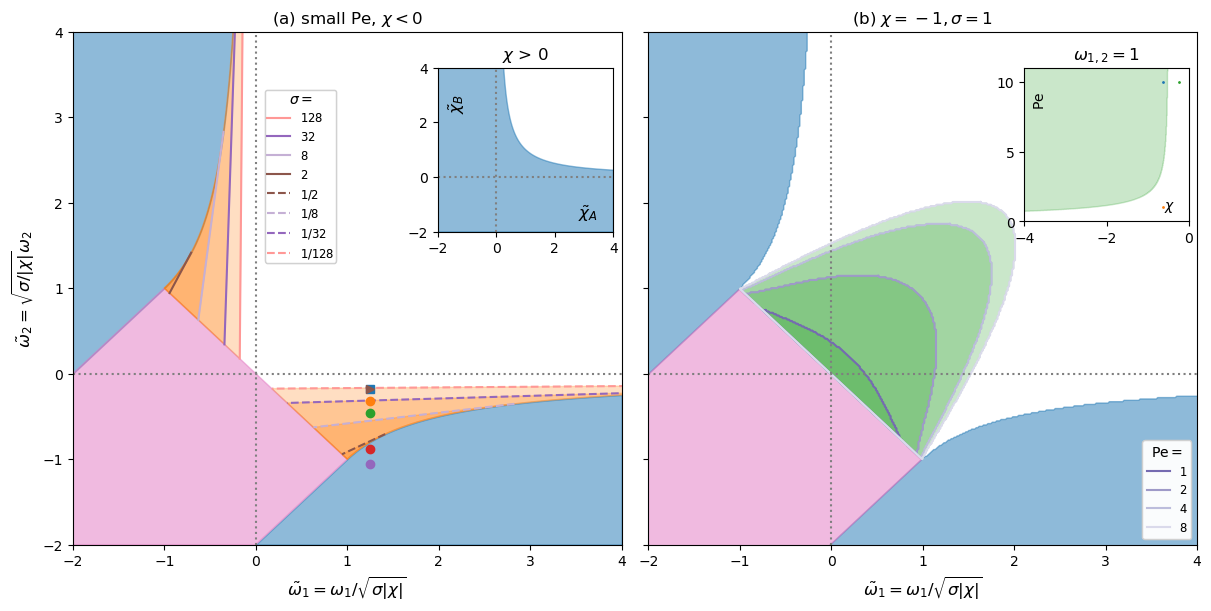

In [8]:
# FIG1: (a, b) phase diagram on (w1, w2) plane with small and large Pe respectively.
# (c) Typical dispersion relations for four type of instabilities. 

def get_tilde_w1_w2(wAA, wBB, wc, sigma):
    tilde_w1 = 1 / np.sqrt(sigma * np.abs(wc)) * (wAA + 1)
    tilde_w2 = np.sqrt(sigma / np.abs(wc)) * (wBB + 1)
    return tilde_w1, tilde_w2


def get_wAA_wBB(tilde_w1, tilde_w2, wc, sigma):
    wAA = tilde_w1 * np.sqrt(sigma * np.abs(wc)) - 1
    wBB = tilde_w2 / np.sqrt(sigma / np.abs(wc)) - 1
    return wAA, wBB


fig = plt.figure(constrained_layout=True, figsize=(12, 6))
(ax1, ax2) = fig.subplots(1, 2, sharey=True)
xlim = [-2, 4]
ylim = [-2, 4]

label_font_size = "large"
plot_PD_rho_eq_w1_w2(ax1, xmin=xlim[0], xmax=xlim[1], ymin=ylim[0], ymax=ylim[1])
ax1.set_xlabel(r"$\tilde{\omega}_1=\omega_1/\sqrt{\sigma|\chi|}$", fontsize=label_font_size)
ax1.set_ylabel(r"$\tilde{\omega}_2=\sqrt{\sigma / |\chi|}\omega_2$", fontsize=label_font_size)


# tilde_w1, tilde_w2 = 1.244508, -0.18
# sigma = 1/128
# chi = -0.25 ** 2
# wAA, wBB = get_wAA_wBB(tilde_w1, tilde_w2, chi, sigma)
# print("eta", wAA, wBB)
etaAA = -0.9725
etaBB = -1.5091
chi = -0.25**2
sigma = 1/128
tilde_w1, tilde_w2 = get_tilde_w1_w2(etaAA, etaBB, chi, sigma)
print(tilde_w1, tilde_w2)
ax1.plot(tilde_w1, tilde_w2, "s")

etaAA = -0.9725
etaBB = -1.9
chi = -0.25**2
sigma = 1/128
tilde_w1, tilde_w2 = get_tilde_w1_w2(etaAA, etaBB, chi, sigma)
print(tilde_w1, tilde_w2)
ax1.plot(tilde_w1, tilde_w2, "o")

etaAA = -0.9725
etaBB = -2.3
chi = -0.25**2
sigma = 1/128
tilde_w1, tilde_w2 = get_tilde_w1_w2(etaAA, etaBB, chi, sigma)
print(tilde_w1, tilde_w2)
ax1.plot(tilde_w1, tilde_w2, "o")

etaAA = -0.9725
etaBB = -3.5
chi = -0.25**2
sigma = 1/128
tilde_w1, tilde_w2 = get_tilde_w1_w2(etaAA, etaBB, chi, sigma)
print(tilde_w1, tilde_w2)
ax1.plot(tilde_w1, tilde_w2, "o")

etaAA = -0.9725
etaBB = -4
chi = -0.25**2
sigma = 1/128
tilde_w1, tilde_w2 = get_tilde_w1_w2(etaAA, etaBB, chi, sigma)
print(tilde_w1, tilde_w2)
ax1.plot(tilde_w1, tilde_w2, "o")
# etaAA = -0.9
# etaBB = -1.45
# chi = -0.05 * 1.25
# sigma = 1/9
# tilde_w1, tilde_w2 = get_tilde_w1_w2(etaAA, etaBB, chi, sigma)
# print(tilde_w1, tilde_w2)
# ax1.plot(tilde_w1, tilde_w2, "p")

# etaAA = -0.945
# etaBB = -1.4525
# chi = -0.25**2
# sigma = 1/32
# tilde_w1, tilde_w2 = get_tilde_w1_w2(etaAA, etaBB, chi, sigma)
# print(tilde_w1, tilde_w2)
# ax1.plot(tilde_w1, tilde_w2, "p")

# chi = -0.25 ** 2
# wAA, wBB = get_wAA_wBB(tilde_w1, tilde_w2, chi, sigma)
# print("eta", wAA, wBB)

# etaAA = -0.989
# etaBB = -1.2036
# chi = -0.1**2
# sigma = 1/128
# tilde_w1, tilde_w2 = get_tilde_w1_w2(etaAA, etaBB, chi, sigma)
# print(tilde_w1, tilde_w2)
# ax1.plot(tilde_w1, tilde_w2, "p")

# # chi = -0.25 ** 2
# # wAA, wBB = get_wAA_wBB(tilde_w1, tilde_w2, chi, sigma)
# # print("eta", wAA, wBB)

ax1.plot(1.244508, -0.18, ">")
Pe = 1
wc = -1
sigma_D = 1
sigma_v = 1
extent, state, q_range = get_PD_tilde_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2.5, Nq=500, resolution=1000)
x, y = plot_PD_tilde_w1_w2(state, extent, xlim, ylim, ax=ax2)
# mask = x + y > 0.0001
# x = x[mask]
# y = y[mask]
cm = plt.cm.get_cmap('tab20c')
line, = ax2.plot(x, y, "-", c=cm.colors[12], label="%g" % Pe)
line_list = [line]
for i, Pe in enumerate([2, 4, 8]):
    extent, state, q_range = get_PD_tilde_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2.5, Nq=500, resolution=1000)
    x, y = plot_PD_tilde_w1_w2(state, extent, xlim, ylim, ax=ax2, only_SWO=True)
    line, = ax2.plot(x, y, c=cm.colors[i+13], label="%g" % Pe)
    line_list.append(line)
ax2.set_xlabel(r"$\tilde{\omega}_1=\omega_1/\sqrt{\sigma|\chi|}$", fontsize=label_font_size)
ax2.legend()
ax2.axhline(0, linestyle=":", color="tab:grey")
ax2.axvline(0, linestyle=":", color="tab:grey")
line_legend = ax2.legend(handles=line_list, title=r"${\rm Pe}=$", loc="lower right", fontsize="small")
ax2.add_artist(line_legend)

# ax2_in = ax2.inset_axes([0.13, 0.08, 0.32, 0.32])
ax2_in = ax2.inset_axes([0.685, 0.63, 0.3, 0.3])

extent, state, q_range = get_PD_wc_Pe_data(1, 1, 1, 1, overwrite=False)
plot_PD_wc_Pe(state, extent, ax=ax2_in, xlim=[-4, 0], ylim=[0, 11])
ax2_in.set_xticks([-4, -2, 0])
ax2_in.set_yticks([0, 5, 10])
ax2_in.set_title(r"$\omega_{1,2}=1$")
ax2_in.text(0.85, 0.08, r"$\chi$", transform=ax2_in.transAxes)
ax2_in.text(0.05, 0.75, r"${\rm Pe}$", transform=ax2_in.transAxes, rotation='vertical')
ax2_in.plot(-0.8**2, 10, "o", ms=1)
ax2_in.plot(-0.8**2, 1, "o", ms=1)
ax2_in.plot(-0.5**2, 10, "o", ms=1)


ax1.set_title(r"(a) small Pe, $\chi < 0$")
ax2.set_title("(b) $\chi=-1, \sigma=1$")

plt.show()
# plt.savefig("fig/f1.pdf")
plt.close()

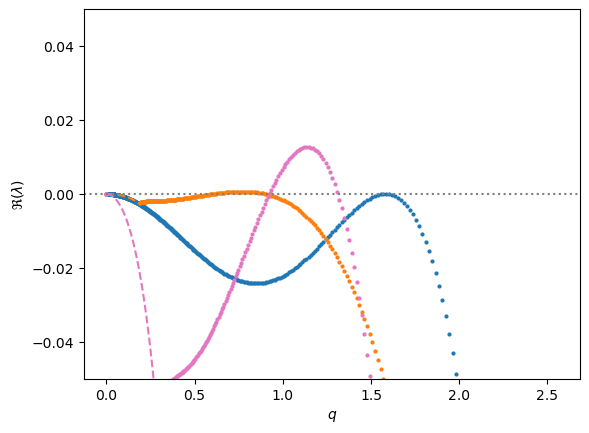

In [9]:
from NRQS_Turing import DMatrix_w_surface_tension
# ax3.set_xlabel(r"$q$", fontsize=label_font_size, labelpad=0.5)
# ax3.set_ylabel(r"$\Re(\lambda)$", fontsize=label_font_size)

# q_arr = np.linspace(1e-6, np.sqrt(20/3), 1000)
q_arr = np.logspace(-4, np.log10(np.sqrt(20/3)), 1000, endpoint=False)

eta_AA = -0.58
eta_BB = -2.58
eta_AB = 1
eta_BA = -1
M1 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=4, bar_vB=1)

# eta_AA = -0.78
# eta_BB = -2.81
# eta_AB = 1
# eta_BA = -1
# M2 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=4, bar_vB=1)

# eta_AA = -0.945
# eta_BB = -1.4525
# eta_AB = 0.25
# eta_BA = -0.25
# M3 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=4, bar_vB=1)

eta_AA = -0.989
eta_BB = -1.2036
eta_AB = 0.1
eta_BA = -0.1
M2 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=8, bar_vB=1)

eta_AA = -0.9725
eta_BB = -1.5091
eta_AB = 0.25
eta_BA = -0.25
M3 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=8, bar_vB=1)

c_list = ["tab:blue", "tab:orange", "tab:pink", "tab:green"]
M_list = [M1, M2, M3]
scale_factor = np.array([1, 1, 4, 1]) * 1
for i, M in enumerate(M_list):
    lamb = M.get_lambda_q(q_arr).max(axis=1)
    mask_r = np.abs(lamb.imag) <= 1e-8
    mask_i = mask_r == False

    line, = plt.plot(q_arr[mask_r], lamb[mask_r].real * scale_factor[i], "o", c=c_list[i], ms=2)
    plt.plot(q_arr[mask_i], lamb[mask_i].real * scale_factor[i], c=line.get_c(), linestyle="dashed")
    # line, = plt.plot(q_arr, np.abs(lamb.imag) * Dr[i], c=c_list[i])

plt.ylim(-0.05, 0.05)
plt.axhline(0, c="tab:grey", linestyle="dotted")
plt.xlabel(r"$q$")
plt.ylabel(r"$\Re(\lambda)$")
plt.show()
plt.close()

0.30000000000000004
0.5
0.7000000000000002


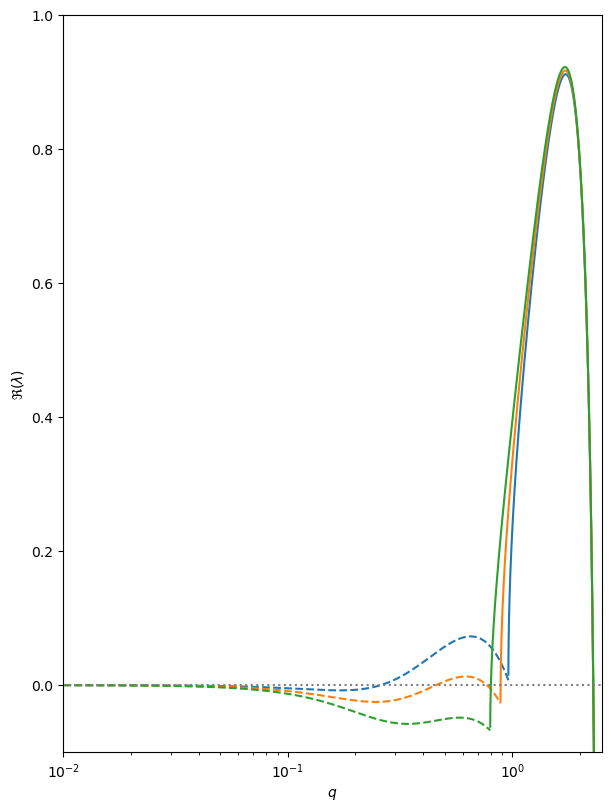

In [10]:
from NRQS_Turing import DMatrix_w_surface_tension
# ax3.set_xlabel(r"$q$", fontsize=label_font_size, labelpad=0.5)
# ax3.set_ylabel(r"$\Re(\lambda)$", fontsize=label_font_size)

# q_arr = np.linspace(1e-6, np.sqrt(20/3), 1000)
q_arr = np.logspace(-2, np.log10(np.sqrt(20/3)), 100000, endpoint=False)

# eta_AA = -0.58
# eta_BB = -2.58
# eta_AB = 1
# eta_BA = -1
# M1 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=4, bar_vB=1)

# eta_AA = -0.78
# eta_BB = -2.81
# eta_AB = 1
# eta_BA = -1
# M2 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=4, bar_vB=1)

# eta_AA = -0.945
# eta_BB = -1.4525
# eta_AB = 0.25
# eta_BA = -0.25
# M3 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=4, bar_vB=1)

# eta_AA = -0.989
# eta_BB = -1.2036
# eta_AB = 0.1
# eta_BA = -0.1
# M2 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=8, bar_vB=1)

# eta_AA = -0.9725
# eta_BB = -1.5091
# eta_AB = 0.25
# eta_BA = -0.25
# M3 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=8, bar_vB=1)


def plot_lambda(x, y, ax, threshold=1e-8):
    mask_r = np.abs(y.imag) <= threshold
    turning_pts = [0]
    states = [mask_r[0]]
    for i in range(x.size):
        if states[-1] != mask_r[i]:
            turning_pts.append(i)
            states.append(mask_r[i])
    turning_pts.append(x.size)
    line = None
    for i, s in enumerate(states):
        beg, end = turning_pts[i], turning_pts[i+1]
        xx = x[beg:end]
        yy = y[beg:end].real
        if s:
            ls = "-"
        else:
            ls = "--"
        if line is None:
            line, = ax.plot(xx, yy, ls)
        else:
            ax.plot(xx, yy, ls, c=line.get_c())


chi_A = 0.8
chi_B = -0.5
fig, ax = plt.subplots(figsize=(6, 8), constrained_layout=True)
dx = 0.2
eta_AB = 1
eta_BA = -1
wc = eta_AB * eta_BA
sigma = 1/64
for i in range(3):
    chi_A_new = chi_A + dx * i
    chi_B_new = chi_B
    print(chi_A_new + chi_B_new)
    eta_AA, eta_BB = get_wAA_wBB(chi_A_new, chi_B_new, wc, sigma)
    
    M = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=1, Dr_B=1, bar_vA=8, bar_vB=1)
    lamb = M.get_lambda_q(q_arr).max(axis=1)
    # mask_q = np.logical_and(q_arr < 2, q_arr>1.4e-2)
    # q_arr = q_arr[mask_q]
    # lamb = lamb[mask_q]
    # mask_r = np.abs(lamb.imag) <= 1e-8
    # mask_i = mask_r == False

    # line, = plt.plot(q_arr[mask_r], lamb[mask_r].real)
    # plt.plot(q_arr[mask_i], lamb[mask_i].real , "--", c=line.get_c())
    # line, = plt.plot(q_arr, np.abs(lamb.imag) * Dr[i], c=c_list[i])
    plot_lambda(q_arr, lamb, ax)

ax.set_ylim(-0.1, 1)
ax.set_xlim(1e-2, 2.5)
ax.set_xscale("log")
ax.axhline(0, c="tab:grey", linestyle="dotted")
ax.set_xlabel(r"$q$")
ax.set_ylabel(r"$\Re(\lambda)$")
plt.show()
plt.close()

1.0645139037372864
0.9645139037372863
0.8645139037372863
0.7645139037372862
0.6645139037372865
0.5645139037372864
0.4645139037372863
0.3645139037372863
0.26451390373728634
0.16451390373728647


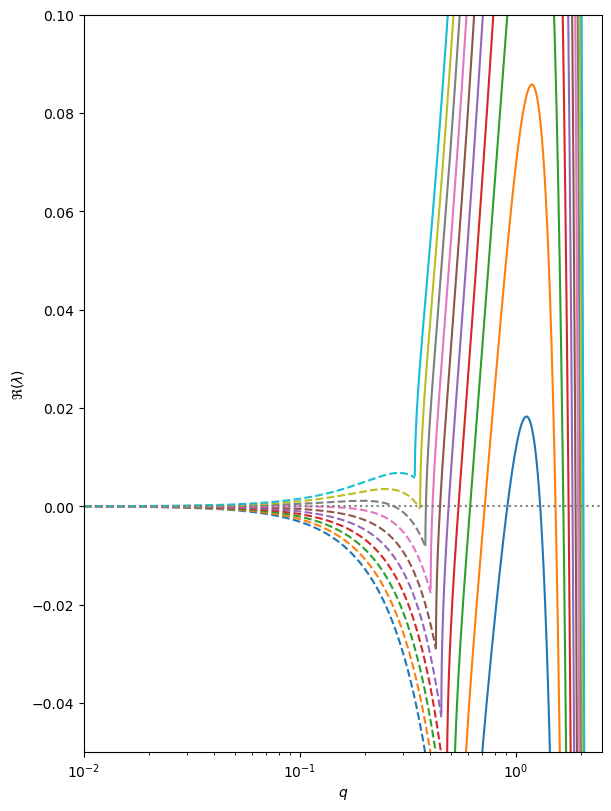

In [11]:
from NRQS_Turing import DMatrix_w_surface_tension
# ax3.set_xlabel(r"$q$", fontsize=label_font_size, labelpad=0.5)
# ax3.set_ylabel(r"$\Re(\lambda)$", fontsize=label_font_size)

# q_arr = np.linspace(1e-6, np.sqrt(20/3), 1000)
q_arr = np.logspace(-2, np.log10(np.sqrt(20/3)), 100000, endpoint=False)

# eta_AA = -0.58
# eta_BB = -2.58
# eta_AB = 1
# eta_BA = -1
# M1 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=4, bar_vB=1)

# eta_AA = -0.78
# eta_BB = -2.81
# eta_AB = 1
# eta_BA = -1
# M2 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=4, bar_vB=1)

# eta_AA = -0.945
# eta_BB = -1.4525
# eta_AB = 0.25
# eta_BA = -0.25
# M3 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=4, bar_vB=1)

# eta_AA = -0.989
# eta_BB = -1.2036
# eta_AB = 0.1
# eta_BA = -0.1
# M2 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=8, bar_vB=1)

# eta_AA = -0.9725
# eta_BB = -1.5091
# eta_AB = 0.25
# eta_BA = -0.25
# M3 = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=3, Dr_B=6, bar_vA=8, bar_vB=1)


def plot_lambda(x, y, ax, threshold=1e-8):
    mask_r = np.abs(y.imag) <= threshold
    turning_pts = [0]
    states = [mask_r[0]]
    for i in range(x.size):
        if states[-1] != mask_r[i]:
            turning_pts.append(i)
            states.append(mask_r[i])
    turning_pts.append(x.size)
    line = None
    for i, s in enumerate(states):
        beg, end = turning_pts[i], turning_pts[i+1]
        xx = x[beg:end]
        yy = y[beg:end].real
        if s:
            ls = "-"
        else:
            ls = "--"
        if line is None:
            line, = ax.plot(xx, yy, ls)
        else:
            ax.plot(xx, yy, ls, c=line.get_c())


eta_AA = -0.9725
eta_BB = -1.5091
eta_AB = 0.25
eta_BA = -0.25
wc = eta_AB * eta_BA
sigma = 1/128

chi_A, chi_B = get_tilde_w1_w2(eta_AA, eta_BB, wc, sigma)
fig, ax = plt.subplots(figsize=(6, 8), constrained_layout=True)
dx = 0.05

for i in range(10):
    chi_A_new = chi_A - dx * i
    chi_B_new = chi_B - dx * i
    print(chi_A_new + chi_B_new)
    eta_AA, eta_BB = get_wAA_wBB(chi_A_new, chi_B_new, wc, sigma)
    
    M = DMatrix_w_surface_tension(eta_AA, eta_AB, eta_BA, eta_BB, phiA=1, phiB=1, Dr_A=1, Dr_B=1, bar_vA=8, bar_vB=1)
    lamb = M.get_lambda_q(q_arr).max(axis=1)
    # mask_q = np.logical_and(q_arr < 2, q_arr>1.4e-2)
    # q_arr = q_arr[mask_q]
    # lamb = lamb[mask_q]
    # mask_r = np.abs(lamb.imag) <= 1e-8
    # mask_i = mask_r == False

    # line, = plt.plot(q_arr[mask_r], lamb[mask_r].real)
    # plt.plot(q_arr[mask_i], lamb[mask_i].real , "--", c=line.get_c())
    # line, = plt.plot(q_arr, np.abs(lamb.imag) * Dr[i], c=c_list[i])
    plot_lambda(q_arr, lamb, ax)

ax.set_ylim(-0.05, 0.1)
ax.set_xlim(1e-2, 2.5)
ax.set_xscale("log")
ax.axhline(0, c="tab:grey", linestyle="dotted")
ax.set_xlabel(r"$q$")
ax.set_ylabel(r"$\Re(\lambda)$")
plt.show()
plt.close()

[[ 42.5   0. ]
 [ 42.5   1. ]
 [ 42.5   2. ]
 ...
 [997.  947.5]
 [998.  947.5]
 [999.  947.5]]


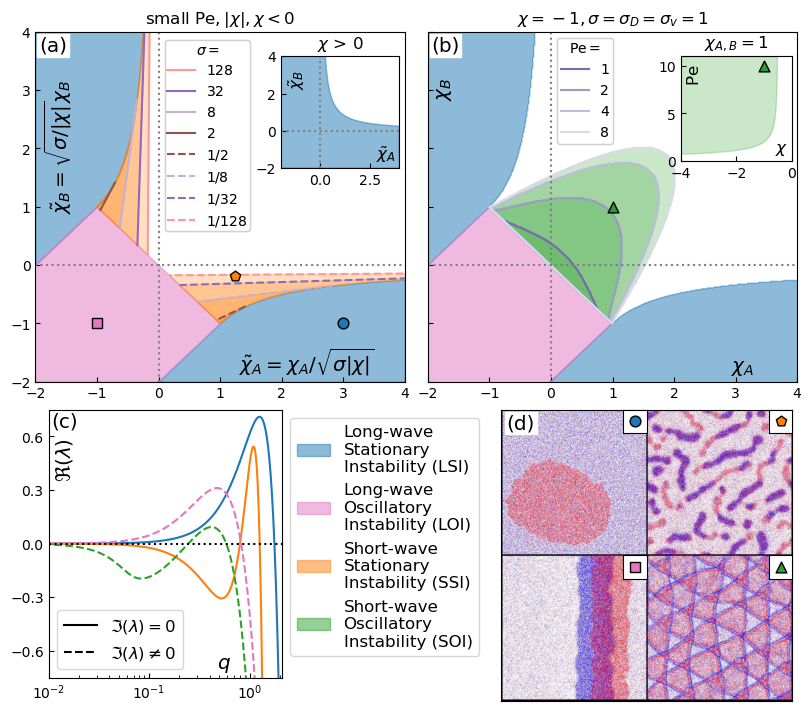

In [12]:
# new FIG1: (a, b) phase diagram on (w1, w2) plane with small and large Pe respectively.
# (c) Typical dispersion relations for four type of instabilities. 
# (d) Typical snapshots
import matplotlib.patches as mpatches
from matplotlib import image as mpimg
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

fig = plt.figure(constrained_layout=True, figsize=(8, 7))
subfigs = fig.subfigures(2, 1, wspace=0.001, hspace=0.002, height_ratios=[3, 2.25])
(ax1, ax2) = subfigs[0].subplots(1, 2, sharey=True)

# (ax3, ax4) = subfigs[1].subplots(1, 2, width_ratios=[1, 3])
(subfig3, subfig4) = subfigs[1].subfigures(1, 2, wspace=0.01, width_ratios=[2.4, 1.6])
# ax3 = subfig3.add_subplot(1, 2, 1)
ax3 = subfig3.subplots()
ax4 = subfig4.subplots()
xlim = [-2, 4]
ylim = [-2, 4]

label_font_size = "x-large"
plot_PD_rho_eq_w1_w2(ax1, xmin=xlim[0], xmax=xlim[1], ymin=ylim[0], ymax=ylim[1], loc_line_legend=(0.35, 0.43), loc_fill_legend=(0.41, 0.2), legend_font_size="medium")

xlabel = r"$\tilde{\chi}_A=\chi_A/\sqrt{\sigma|\chi|}$"
ylabel = r"$\tilde{\chi}_B=\sqrt{\sigma / |\chi|}\chi_B$"
# ax1.set_xlabel(xlabel, fontsize=label_font_size)
# ax1.set_ylabel(ylabel, fontsize=label_font_size)

Pe = 1
sigma_D=1
sigma_v = 1
wc = -1
extent, state, q_range = get_PD_tilde_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2.5, Nq=500, resolution=1000)
x, y = plot_PD_tilde_w1_w2(state, extent, xlim, ylim, ax=ax2, legend_loc=(0.28, 0.68), legend_font_size="medium")
# mask = x + y > 0.0001
# x = x[mask]
# y = y[mask]
cm = plt.cm.get_cmap('tab20c')
line, = ax2.plot(x, y, "-", c=cm.colors[12], label="%g" % Pe)
line_list = [line]
for i, Pe in enumerate([2, 4, 8]):
    extent, state, q_range = get_PD_tilde_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2.5, Nq=500, resolution=1000)
    x, y = plot_PD_tilde_w1_w2(state, extent, xlim, ylim, ax=ax2, only_SWO=True)
    line, = ax2.plot(x, y, c=cm.colors[i+13], label="%g" % Pe)
    line_list.append(line)
# ax2.set_xlabel(xlabel, fontsize=label_font_size)

# ax2.legend()
ax2.axhline(0, linestyle=":", color="tab:grey")
ax2.axvline(0, linestyle=":", color="tab:grey")
line_legend = ax2.legend(handles=line_list, title=r"${\rm Pe}=$", loc=(0.35, 0.68), fontsize="medium", borderpad=0.3)
ax2.add_artist(line_legend)

# ax2_in = ax2.inset_axes([0.13, 0.08, 0.32, 0.32])
ax2_in = ax2.inset_axes([0.685, 0.63, 0.3, 0.3])

extent, state, q_range = get_PD_wc_Pe_data(1, 1, 1, 1, overwrite=False)
plot_PD_wc_Pe(state, extent, ax=ax2_in, xlim=[-4, 0], ylim=[0, 11])
ax2_in.set_xticks([-4, -2, 0])
ax2_in.set_yticks([0, 5, 10])
ax2_in.set_title(r"$\chi_{A,B}=1$")
ax2_in.text(0.85, 0.08, r"$\chi$", transform=ax2_in.transAxes, fontsize="large")
ax2_in.text(0.05, 0.75, r"${\rm Pe}$", transform=ax2_in.transAxes, rotation='vertical', fontsize="large")
# ax2_in.plot(-0.8**2, 10, "o", ms=1)
# ax2_in.plot(-0.8**2, 1, "o", ms=1)
# ax2_in.plot(-0.5**2, 10, "o", ms=1)
ax2_in.scatter(-1, 10, s=60, c="tab:green", marker="^", edgecolors="k", zorder=2.5)
# with open("data/PD_wc_Pe/Dr_etaAB.txt", "r") as f:
#     lines = f.readlines()
#     for line in lines:
#         s = line.rstrip("\n").split(";")
#         Dr, eta_AB, state = float(s[0]), float(s[1]), int(s[2])
#         if state == 1:
#             ax2_in.plot(-eta_AB**2, 1/Dr, "^", c="tab:green", ms=3, fillstyle="none")
#         else:
#             ax2_in.plot(-eta_AB**2, 1/Dr, "x", c="tab:grey", ms=3)

### ax3E
from NRQS_Turing import DMatrix_w_surface_tension
# ax3.set_xlabel(r"$q$", fontsize=label_font_size, labelpad=0.5)
# ax3.set_ylabel(r"$\Re(\lambda)$", fontsize=label_font_size)

# q_arr = np.linspace(1e-6, np.sqrt(20/3), 1000)
q_arr = np.logspace(-4, np.log10(np.sqrt(20/3)), 1000, endpoint=False)

M1 = DMatrix_w_surface_tension(1, -3.125, 0.32, -2.2, phiA=1, phiB=1, Dr_A=6, Dr_B=6, bar_vA=3, bar_vB=1)
M2 = DMatrix_w_surface_tension(-0.2, -3.125, 0.32, -2.21, phiA=1, phiB=1, Dr_A=6, Dr_B=6, bar_vA=3, bar_vB=1)
# M2 = DMatrix_w_surface_tension(-0.21, -3.125, 0.32, -2.25, phiA=1, phiB=1, Dr_A=6, Dr_B=6, bar_vA=3, bar_vB=1)

M3 = DMatrix_w_surface_tension(-1.1, 0.08, -0.125, -1.1, phiA=1, phiB=1, Dr_A=0.1, Dr_B=0.1, bar_vA=1, bar_vB=1)
M4 = DMatrix_w_surface_tension(0, 0.8, -0.8, 0, phiA=1, phiB=1, Dr_A=0.1, Dr_B=0.1, bar_vA=1, bar_vB=1)
c_list = ["tab:blue", "tab:orange", "tab:pink", "tab:green"]
M_list = [M1, M2, M3, M4]
scale_factor = np.array([0.15, 6, 0.1, 0.1]) * 100
for i, M in enumerate(M_list):
    lamb = M.get_lambda_q(q_arr).max(axis=1)
    mask_r = np.abs(lamb.imag) <= 1e-8
    mask_i = mask_r == False

    line, = ax3.plot(q_arr[mask_r], lamb[mask_r].real * scale_factor[i], c=c_list[i])
    ax3.plot(q_arr[mask_i], lamb[mask_i].real * scale_factor[i], c=line.get_c(), linestyle="dashed")
    # line, = plt.plot(q_arr, np.abs(lamb.imag) * Dr[i], c=c_list[i])

line1 = ax3.axhline(-100, linestyle="-", c="k", label=r"$\Im(\lambda)=0$")
line2 = ax3.axhline(-100, linestyle="--", c="k", label=r"$\Im(\lambda)\neq 0$")
legend1 = ax3.legend(handles=[line1, line2], fontsize="large", loc="lower left")
ax3.add_artist(legend1)
patches = [mpatches.Patch(color='tab:blue', label='Long-wave\nStationary\nInstability (LSI)', alpha=0.5),
           mpatches.Patch(color='tab:pink', label='Long-wave\nOscillatory\nInstability (LOI)',alpha=0.5),
           mpatches.Patch(color='tab:orange', label='Short-wave\nStationary\nInstability (SSI)', alpha=0.5),
           mpatches.Patch(color='tab:green', label='Short-wave\nOscillatory\nInstability (SOI)', alpha=0.5),
        ]
legend2 = ax3.legend(handles=patches, bbox_to_anchor=(1., 1), loc="upper left", fontsize="large")


ax3.set_xscale("log")
ax3.set_xlim(1e-2, 2.1)
ax3.set_ylim(-0.75, 0.75)
ax3.axhline(0, linestyle=":", c="k")
ax3.set_yticks([-0.6, -0.3, 0, 0.3, 0.6])
### ax4
im = mpimg.imread("/home/yduan/Desktop/NRQS1_Fig/fig1/snap.jpg")
ax4.imshow(im)
ax4.set_yticks([])
ax4.set_xticks([])

ax4_in0 = ax4.inset_axes([0.42, 0.92, 0.08, 0.08])
ax4_in0.set_xticks([])
ax4_in0.set_yticks([])
ax4_in0.scatter(0.4, 0.5, s=60, c="tab:blue", marker="o", edgecolors="k")
ax1.scatter(3, -1, s=60, c="tab:blue", marker="o", edgecolors="k")


ax4_in0 = ax4.inset_axes([0.92, 0.92, 0.08, 0.08])
ax4_in0.set_xticks([])
ax4_in0.set_yticks([])
ax4_in0.scatter(0.4, 0.5, s=60, c="tab:orange", marker="p", edgecolors="k")
ax1.scatter(1.245, -0.18, s=60, c="tab:orange", marker="p", edgecolors="k", zorder=2.5)


ax4_in0 = ax4.inset_axes([0.42, 0.42, 0.08, 0.08])
ax4_in0.set_xticks([])
ax4_in0.set_yticks([])
ax4_in0.scatter(0.4, 0.5, s=60, c="tab:pink", marker="s", edgecolors="k")
ax1.scatter(-1, -1, s=60, c="tab:pink", marker="s", edgecolors="k")

ax4_in0 = ax4.inset_axes([0.92, 0.42, 0.08, 0.08])
ax4_in0.set_xticks([])
ax4_in0.set_yticks([])
ax4_in0.scatter(0.4, 0.5, s=60, c="tab:green", marker="^", edgecolors="k")
ax2.scatter(1, 1, s=60, c="tab:green", marker="^", edgecolors="k", zorder=2.5)

# ax4.arrow(0.25, 0.25, -0.1, 0, transform=ax4.transAxes, width=0.01)

ax1.set_title(r"small ${\rm Pe},|\chi|,\chi < 0$", fontsize="large")
ax2.set_title("$\chi=-1, \sigma=\sigma_D=\sigma_v=1$", fontsize="large")
# ax3.set_title("(c)", fontsize="large")
# ax4.set_title("(d)", fontsize="large")

# ax3.text(-0.4, 0.48, r"$\Re (\lambda)$", rotation='vertical', fontsize=label_font_size)

# subfig4.text(0.7, 0.99, xlabel, fontsize=label_font_size)
# subfig4.text(0.03, 0.99, xlabel, fontsize=label_font_size)
# subfig3.text(0.7, 0.02, r"$q$", fontsize=label_font_size)
# ax3.legend(fontsize="large", handletextpad=0.1, loc=(0.05, 0.1), labelspacing=0.1, borderpad=0.2)
ax3.text(0.02, 0.75, r"$\Re(\lambda)$", rotation=90, transform=ax3.transAxes, fontsize=label_font_size)
ax3.text(0.72, 0.035, r"$q$", rotation=0, transform=ax3.transAxes, fontsize=label_font_size)

ax1.text(0.02, 0.5, ylabel, rotation=90, transform=ax1.transAxes, fontsize=label_font_size)
ax1.text(0.55, 0.03, xlabel, rotation=0, transform=ax1.transAxes, fontsize=label_font_size)
ax2.text(0.02, 0.82, r"$\chi_B$", rotation=90, transform=ax2.transAxes, fontsize=label_font_size)
ax2.text(0.82, 0.03, r"$\chi_A$", rotation=0, transform=ax2.transAxes, fontsize=label_font_size)


# ax1.text(0.02, 0.75, r"$\tilde{\omega}_2$", rotation=90, transform=ax1.transAxes, fontsize=label_font_size)

bbox=dict(edgecolor="w", facecolor="w", boxstyle="Square, pad=0.08")
ax1.text(0.01, 0.945, "(a)", fontsize="x-large", transform=ax1.transAxes, backgroundcolor="w", bbox=bbox)
ax2.text(0.01, 0.945, "(b)", fontsize="x-large", transform=ax2.transAxes, backgroundcolor="w", bbox=bbox)
ax3.text(0.01, 0.935, "(c)", fontsize="x-large", transform=ax3.transAxes)

ax4.text(0.02, 0.935, "(d)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)


# ax4.text(0.02, 0.4375, "(f)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)
# ax4.text(0.51, 0.935, "(e)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)
# ax4.text(0.51, 0.4375, "(g)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)
# ax4.text(0.508, 0.935, "(h)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)

# ax4.text(0.008, 0.935, "(h)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=dict(edgecolor="w", facecolor="w", boxstyle="Square, pad=0.08"))

plt.show()
# plt.savefig("fig/f1.pdf", dpi=200)
plt.close()

[[ 42.5   0. ]
 [ 42.5   1. ]
 [ 42.5   2. ]
 ...
 [997.  947.5]
 [998.  947.5]
 [999.  947.5]]


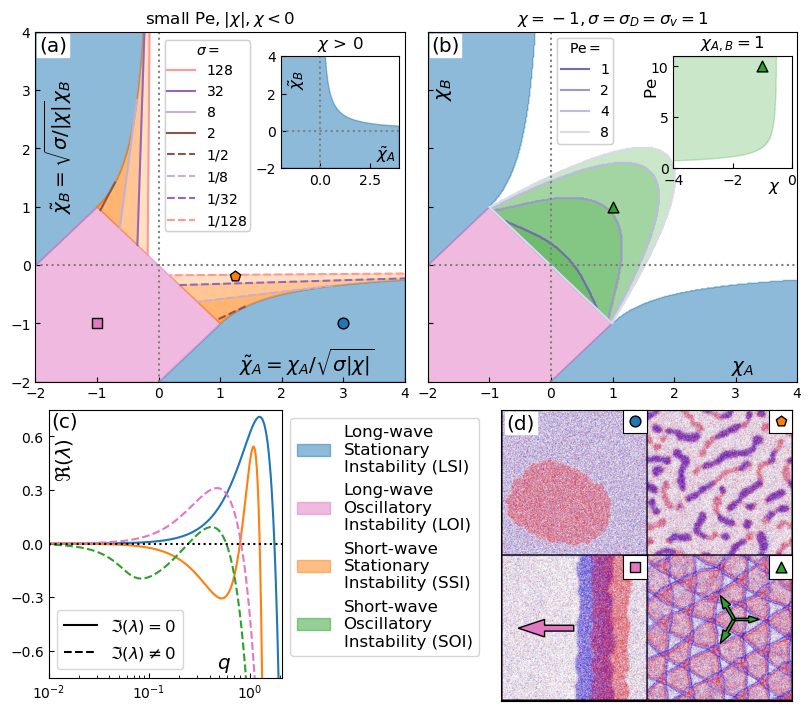

In [13]:
# new FIG1: (a, b) phase diagram on (w1, w2) plane with small and large Pe respectively.
# (c) Typical dispersion relations for four type of instabilities. 
# (d) Typical snapshots
import matplotlib.patches as mpatches
from matplotlib import image as mpimg
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

fig = plt.figure(constrained_layout=True, figsize=(8, 7))
subfigs = fig.subfigures(2, 1, wspace=0.001, hspace=0.002, height_ratios=[3, 2.25])
(ax1, ax2) = subfigs[0].subplots(1, 2, sharey=True)

# (ax3, ax4) = subfigs[1].subplots(1, 2, width_ratios=[1, 3])
(subfig3, subfig4) = subfigs[1].subfigures(1, 2, wspace=0.01, width_ratios=[2.4, 1.6])
# ax3 = subfig3.add_subplot(1, 2, 1)
ax3 = subfig3.subplots()
ax4 = subfig4.subplots()
xlim = [-2, 4]
ylim = [-2, 4]

label_font_size = "x-large"
plot_PD_rho_eq_w1_w2(ax1, xmin=xlim[0], xmax=xlim[1], ymin=ylim[0], ymax=ylim[1], loc_line_legend=(0.35, 0.43), loc_fill_legend=(0.41, 0.2), legend_font_size="medium")

xlabel = r"$\tilde{\chi}_A=\chi_A/\sqrt{\sigma|\chi|}$"
ylabel = r"$\tilde{\chi}_B=\sqrt{\sigma / |\chi|}\chi_B$"
# ax1.set_xlabel(xlabel, fontsize=label_font_size)
# ax1.set_ylabel(ylabel, fontsize=label_font_size)

Pe = 1
sigma_D=1
sigma_v = 1
wc = -1
extent, state, q_range = get_PD_tilde_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2.5, Nq=500, resolution=1000)
x, y = plot_PD_tilde_w1_w2(state, extent, xlim, ylim, ax=ax2, legend_loc=(0.28, 0.68), legend_font_size="medium")
# mask = x + y > 0.0001
# x = x[mask]
# y = y[mask]
cm = plt.cm.get_cmap('tab20c')
line, = ax2.plot(x, y, "-", c=cm.colors[12], label="%g" % Pe)
line_list = [line]
for i, Pe in enumerate([2, 4, 8]):
    extent, state, q_range = get_PD_tilde_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2.5, Nq=500, resolution=1000)
    x, y = plot_PD_tilde_w1_w2(state, extent, xlim, ylim, ax=ax2, only_SWO=True)
    line, = ax2.plot(x, y, c=cm.colors[i+13], label="%g" % Pe)
    line_list.append(line)
# ax2.set_xlabel(xlabel, fontsize=label_font_size)

# ax2.legend()
ax2.axhline(0, linestyle=":", color="tab:grey")
ax2.axvline(0, linestyle=":", color="tab:grey")
line_legend = ax2.legend(handles=line_list, title=r"${\rm Pe}=$", loc=(0.35, 0.68), fontsize="medium", borderpad=0.3)
ax2.add_artist(line_legend)

# ax2_in = ax2.inset_axes([0.13, 0.08, 0.32, 0.32])
ax2_in = ax2.inset_axes([0.665, 0.61, 0.32, 0.32])

extent, state, q_range = get_PD_wc_Pe_data(1, 1, 1, 1, overwrite=False)
plot_PD_wc_Pe(state, extent, ax=ax2_in, xlim=[-4, 0], ylim=[0, 11])
ax2_in.set_xticks([-4, -2, 0])
ax2_in.set_yticks([0, 5, 10])
ax2_in.set_title(r"$\chi_{A,B}=1$")
# ax2_in.text(0.85, 0.08, r"$\chi$", transform=ax2_in.transAxes, fontsize="large")
# ax2_in.text(0.05, 0.75, r"${\rm Pe}$", transform=ax2_in.transAxes, rotation='vertical', fontsize="large")
ax2_in.text(0.8, -0.2, r"$\chi$", transform=ax2_in.transAxes, fontsize="large")
ax2_in.text(-0.25, 0.65, r"${\rm Pe}$", transform=ax2_in.transAxes, rotation='vertical', fontsize="large")
# ax2_in.plot(-0.8**2, 10, "o", ms=1)
# ax2_in.plot(-0.8**2, 1, "o", ms=1)
# ax2_in.plot(-0.5**2, 10, "o", ms=1)
ax2_in.scatter(-1, 10, s=60, c="tab:green", marker="^", edgecolors="k", zorder=2.5)
# with open("data/PD_wc_Pe/Dr_etaAB.txt", "r") as f:
#     lines = f.readlines()
#     for line in lines:
#         s = line.rstrip("\n").split(";")
#         Dr, eta_AB, state = float(s[0]), float(s[1]), int(s[2])
#         if state == 1:
#             ax2_in.plot(-eta_AB**2, 1/Dr, "^", c="tab:green", ms=3, fillstyle="none")
#         else:
#             ax2_in.plot(-eta_AB**2, 1/Dr, ".", c="tab:grey", ms=3)

### ax3E
from NRQS_Turing import DMatrix_w_surface_tension
# ax3.set_xlabel(r"$q$", fontsize=label_font_size, labelpad=0.5)
# ax3.set_ylabel(r"$\Re(\lambda)$", fontsize=label_font_size)

# q_arr = np.linspace(1e-6, np.sqrt(20/3), 1000)
q_arr = np.logspace(-4, np.log10(np.sqrt(20/3)), 1000, endpoint=False)

M1 = DMatrix_w_surface_tension(1, -3.125, 0.32, -2.2, phiA=1, phiB=1, Dr_A=6, Dr_B=6, bar_vA=3, bar_vB=1)
M2 = DMatrix_w_surface_tension(-0.2, -3.125, 0.32, -2.21, phiA=1, phiB=1, Dr_A=6, Dr_B=6, bar_vA=3, bar_vB=1)
# M2 = DMatrix_w_surface_tension(-0.21, -3.125, 0.32, -2.25, phiA=1, phiB=1, Dr_A=6, Dr_B=6, bar_vA=3, bar_vB=1)

M3 = DMatrix_w_surface_tension(-1.1, 0.08, -0.125, -1.1, phiA=1, phiB=1, Dr_A=0.1, Dr_B=0.1, bar_vA=1, bar_vB=1)
M4 = DMatrix_w_surface_tension(0, 0.8, -0.8, 0, phiA=1, phiB=1, Dr_A=0.1, Dr_B=0.1, bar_vA=1, bar_vB=1)
c_list = ["tab:blue", "tab:orange", "tab:pink", "tab:green"]
M_list = [M1, M2, M3, M4]
scale_factor = np.array([0.15, 6, 0.1, 0.1]) * 100
for i, M in enumerate(M_list):
    lamb = M.get_lambda_q(q_arr).max(axis=1)
    mask_r = np.abs(lamb.imag) <= 1e-8
    mask_i = mask_r == False

    line, = ax3.plot(q_arr[mask_r], lamb[mask_r].real * scale_factor[i], c=c_list[i])
    ax3.plot(q_arr[mask_i], lamb[mask_i].real * scale_factor[i], c=line.get_c(), linestyle="dashed")
    # line, = plt.plot(q_arr, np.abs(lamb.imag) * Dr[i], c=c_list[i])

line1 = ax3.axhline(-100, linestyle="-", c="k", label=r"$\Im(\lambda)=0$")
line2 = ax3.axhline(-100, linestyle="--", c="k", label=r"$\Im(\lambda)\neq 0$")
legend1 = ax3.legend(handles=[line1, line2], fontsize="large", loc="lower left")
ax3.add_artist(legend1)
patches = [mpatches.Patch(color='tab:blue', label='Long-wave\nStationary\nInstability (LSI)', alpha=0.5),
           mpatches.Patch(color='tab:pink', label='Long-wave\nOscillatory\nInstability (LOI)',alpha=0.5),
           mpatches.Patch(color='tab:orange', label='Short-wave\nStationary\nInstability (SSI)', alpha=0.5),
           mpatches.Patch(color='tab:green', label='Short-wave\nOscillatory\nInstability (SOI)', alpha=0.5),
        ]
legend2 = ax3.legend(handles=patches, bbox_to_anchor=(1., 1), loc="upper left", fontsize="large")


ax3.set_xscale("log")
ax3.set_xlim(1e-2, 2.1)
ax3.set_ylim(-0.75, 0.75)
ax3.axhline(0, linestyle=":", c="k")
ax3.set_yticks([-0.6, -0.3, 0, 0.3, 0.6])
### ax4
im = mpimg.imread("/home/yduan/Desktop/NRQS1_Fig/fig1/snap.jpg")
ax4.imshow(im)
ax4.set_yticks([])
ax4.set_xticks([])

ax4_in0 = ax4.inset_axes([0.42, 0.92, 0.08, 0.08])
ax4_in0.set_xticks([])
ax4_in0.set_yticks([])
ax4_in0.scatter(0.4, 0.5, s=60, c="tab:blue", marker="o", edgecolors="k")
ax1.scatter(3, -1, s=60, c="tab:blue", marker="o", edgecolors="k")


ax4_in0 = ax4.inset_axes([0.92, 0.92, 0.08, 0.08])
ax4_in0.set_xticks([])
ax4_in0.set_yticks([])
ax4_in0.scatter(0.4, 0.5, s=60, c="tab:orange", marker="p", edgecolors="k")
ax1.scatter(1.245, -0.18, s=60, c="tab:orange", marker="p", edgecolors="k", zorder=2.5)


ax4_in0 = ax4.inset_axes([0.42, 0.42, 0.08, 0.08])
ax4_in0.set_xticks([])
ax4_in0.set_yticks([])
ax4_in0.scatter(0.4, 0.5, s=60, c="tab:pink", marker="s", edgecolors="k")
ax1.scatter(-1, -1, s=60, c="tab:pink", marker="s", edgecolors="k")

ax4_in0 = ax4.inset_axes([0.92, 0.42, 0.08, 0.08])
ax4_in0.set_xticks([])
ax4_in0.set_yticks([])
ax4_in0.scatter(0.4, 0.5, s=60, c="tab:green", marker="^", edgecolors="k")

ax4.arrow(0.25, 0.25, -0.1, 0, transform=ax4.transAxes, width=0.02, color="tab:pink", ec="k")
# ax4.arrow(0.78, 0.28, 0.05, 0, transform=ax4.transAxes, width=0.008)
# ax4.arrow(0.79, 0.28, 0.05, 0, transform=ax4.transAxes, width=0.008)
ax4.arrow(0.80, 0.28, 0.05, 0, transform=ax4.transAxes, width=0.008, color="tab:green", ec="k")
ax4.arrow(0.80, 0.28, 0.05 * np.cos(-np.pi * 2 / 3), 0.05 * np.sin(-np.pi * 2 / 3), transform=ax4.transAxes, width=0.01, color="tab:green", ec="k")
ax4.arrow(0.80, 0.28, 0.05 * np.cos(np.pi * 2 / 3), 0.05 * np.sin(np.pi * 2 / 3), transform=ax4.transAxes, width=0.01, color="tab:green", ec="k")


ax2.scatter(1, 1, s=60, c="tab:green", marker="^", edgecolors="k", zorder=2.5)

ax1.set_title(r"small ${\rm Pe},|\chi|,\chi < 0$", fontsize="large")
ax2.set_title("$\chi=-1, \sigma=\sigma_D=\sigma_v=1$", fontsize="large")
# ax3.set_title("(c)", fontsize="large")
# ax4.set_title("(d)", fontsize="large")

# ax3.text(-0.4, 0.48, r"$\Re (\lambda)$", rotation='vertical', fontsize=label_font_size)

# subfig4.text(0.7, 0.99, xlabel, fontsize=label_font_size)
# subfig4.text(0.03, 0.99, xlabel, fontsize=label_font_size)
# subfig3.text(0.7, 0.02, r"$q$", fontsize=label_font_size)
# ax3.legend(fontsize="large", handletextpad=0.1, loc=(0.05, 0.1), labelspacing=0.1, borderpad=0.2)
ax3.text(0.02, 0.75, r"$\Re(\lambda)$", rotation=90, transform=ax3.transAxes, fontsize=label_font_size)
ax3.text(0.72, 0.035, r"$q$", rotation=0, transform=ax3.transAxes, fontsize=label_font_size)

ax1.text(0.02, 0.5, ylabel, rotation=90, transform=ax1.transAxes, fontsize=label_font_size)
ax1.text(0.55, 0.03, xlabel, rotation=0, transform=ax1.transAxes, fontsize=label_font_size)
ax2.text(0.02, 0.82, r"$\chi_B$", rotation=90, transform=ax2.transAxes, fontsize=label_font_size)
ax2.text(0.82, 0.03, r"$\chi_A$", rotation=0, transform=ax2.transAxes, fontsize=label_font_size)


# ax1.text(0.02, 0.75, r"$\tilde{\omega}_2$", rotation=90, transform=ax1.transAxes, fontsize=label_font_size)

bbox=dict(edgecolor="w", facecolor="w", boxstyle="Square, pad=0.08")
ax1.text(0.01, 0.945, "(a)", fontsize="x-large", transform=ax1.transAxes, backgroundcolor="w", bbox=bbox)
ax2.text(0.01, 0.945, "(b)", fontsize="x-large", transform=ax2.transAxes, backgroundcolor="w", bbox=bbox)
ax3.text(0.01, 0.935, "(c)", fontsize="x-large", transform=ax3.transAxes)

ax4.text(0.02, 0.935, "(d)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)


# ax4.text(0.02, 0.4375, "(f)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)
# ax4.text(0.51, 0.935, "(e)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)
# ax4.text(0.51, 0.4375, "(g)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)
# ax4.text(0.508, 0.935, "(h)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)

# ax4.text(0.008, 0.935, "(h)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=dict(edgecolor="w", facecolor="w", boxstyle="Square, pad=0.08"))

plt.show()
# plt.savefig("fig/f1.pdf", dpi=200)
plt.close()

[[ 42.5   0. ]
 [ 42.5   1. ]
 [ 42.5   2. ]
 ...
 [997.  947.5]
 [998.  947.5]
 [999.  947.5]]


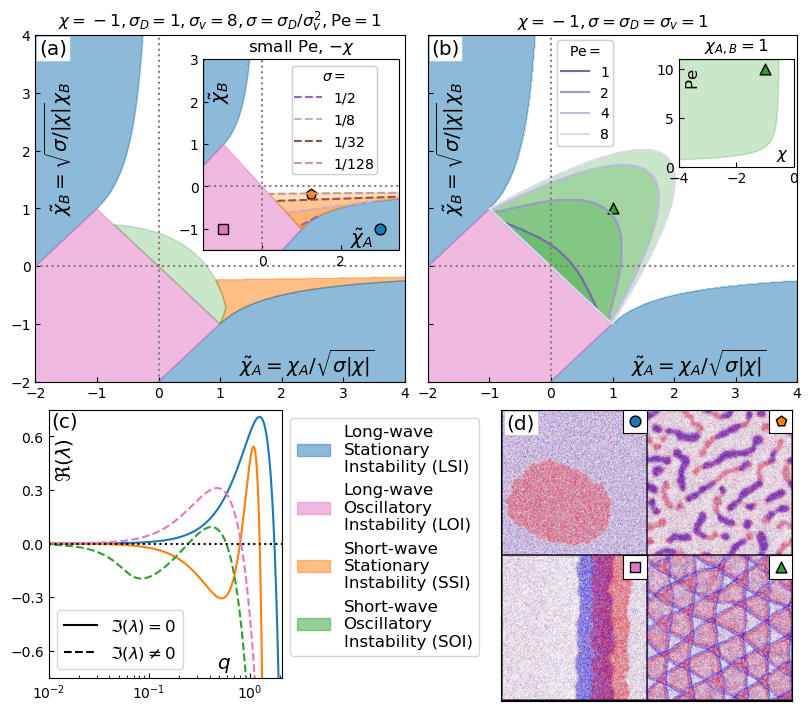

In [14]:
# new FIG1: (a, b) phase diagram on (w1, w2) plane with small and large Pe respectively.
# (c) Typical dispersion relations for four type of instabilities. 
# (d) Typical snapshots
import matplotlib.patches as mpatches
from matplotlib import image as mpimg
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

fig = plt.figure(constrained_layout=True, figsize=(8, 7))
subfigs = fig.subfigures(2, 1, wspace=0.001, hspace=0.002, height_ratios=[3, 2.25])
(ax1, ax2) = subfigs[0].subplots(1, 2, sharey=True)

# (ax3, ax4) = subfigs[1].subplots(1, 2, width_ratios=[1, 3])
(subfig3, subfig4) = subfigs[1].subfigures(1, 2, wspace=0.01, width_ratios=[2.4, 1.6])
# ax3 = subfig3.add_subplot(1, 2, 1)
ax3 = subfig3.subplots()
ax4 = subfig4.subplots()
xlim = [-2, 4]
ylim = [-2, 4]

label_font_size = "x-large"
Pe = 1
sigma_D=1
sigma_v = 8
wc = -1
extent, state, q_range = get_PD_tilde_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2.5, Nq=500, resolution=2000)
x, y = plot_PD_tilde_w1_w2(state, extent, xlim, ylim, ax=ax1, legend_loc=(0.28, 0.68), legend_font_size="medium")
# plot_PD_rho_eq_w1_w2(ax1, xmin=xlim[0], xmax=xlim[1], ymin=ylim[0], ymax=ylim[1], loc_line_legend=(0.35, 0.43), loc_fill_legend=(0.41, 0.2), legend_font_size="medium")

xlabel = r"$\tilde{\chi}_A=\chi_A/\sqrt{\sigma|\chi|}$"
ylabel = r"$\tilde{\chi}_B=\sqrt{\sigma / |\chi|}\chi_B$"
# ax1.set_xlabel(xlabel, fontsize=label_font_size)
# ax1.set_ylabel(ylabel, fontsize=label_font_size)

ax1_in = ax1.inset_axes([0.455, 0.38, 0.53, 0.55])
plot_PD_rho_eq_w1_w2(ax1_in, xmin=-1.5, xmax=3.5, ymin=-1.5, ymax=3, loc_line_legend=(0.45, 0.4), loc_fill_legend=(0.41, 0.2), legend_font_size="medium",
    show_legend=True, has_inset=False,
    sigma_array=np.array([1/2, 1/8, 1/32, 1/128]), half_sigma=True)
Pe = 1
sigma_D=1
sigma_v = 1
wc = -1
extent, state, q_range = get_PD_tilde_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2.5, Nq=500, resolution=1000)
x, y = plot_PD_tilde_w1_w2(state, extent, xlim, ylim, ax=ax2, legend_loc=(0.28, 0.68), legend_font_size="medium")
# mask = x + y > 0.0001
# x = x[mask]
# y = y[mask]
cm = plt.cm.get_cmap('tab20c')
line, = ax2.plot(x, y, "-", c=cm.colors[12], label="%g" % Pe)
line_list = [line]
for i, Pe in enumerate([2, 4, 8]):
    extent, state, q_range = get_PD_tilde_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2.5, Nq=500, resolution=1000)
    x, y = plot_PD_tilde_w1_w2(state, extent, xlim, ylim, ax=ax2, only_SWO=True)
    line, = ax2.plot(x, y, c=cm.colors[i+13], label="%g" % Pe)
    line_list.append(line)
# ax2.set_xlabel(xlabel, fontsize=label_font_size)

# ax2.legend()
ax2.axhline(0, linestyle=":", color="tab:grey")
ax2.axvline(0, linestyle=":", color="tab:grey")
ax1.axhline(0, linestyle=":", color="tab:grey")
ax1.axvline(0, linestyle=":", color="tab:grey")
line_legend = ax2.legend(handles=line_list, title=r"${\rm Pe}=$", loc=(0.35, 0.68), fontsize="medium", borderpad=0.3)
ax2.add_artist(line_legend)

# ax2_in = ax2.inset_axes([0.13, 0.08, 0.32, 0.32])
ax2_in = ax2.inset_axes([0.68, 0.62, 0.31, 0.31])

extent, state, q_range = get_PD_wc_Pe_data(1, 1, 1, 1, overwrite=False)
plot_PD_wc_Pe(state, extent, ax=ax2_in, xlim=[-4, 0], ylim=[0, 11])
ax2_in.set_xticks([-4, -2, 0])
ax2_in.set_yticks([0, 5, 10])
ax2_in.set_title(r"$\chi_{A,B}=1$")
ax2_in.text(0.85, 0.08, r"$\chi$", transform=ax2_in.transAxes, fontsize="large")
ax2_in.text(0.05, 0.75, r"${\rm Pe}$", transform=ax2_in.transAxes, rotation='vertical', fontsize="large")

# with open("data/PD_wc_Pe/Dr_etaAB.txt", "r") as f:
#     lines = f.readlines()
#     for line in lines:
#         s = line.rstrip("\n").split(";")
#         Dr, eta_AB, state = float(s[0]), float(s[1]), int(s[2])
#         if state == 1:
#             ax2_in.plot(-eta_AB**2, 1/Dr, "^", c="tab:green", ms=3, fillstyle="none")
#         else:
#             ax2_in.plot(-eta_AB**2, 1/Dr, "x", c="tab:grey", ms=3)
# ax2_in.plot(-0.8**2, 10, "o", ms=1)
# ax2_in.plot(-0.8**2, 1, "o", ms=1)
# ax2_in.plot(-0.5**2, 10, "o", ms=1)

### ax3E
from NRQS_Turing import DMatrix_w_surface_tension
# ax3.set_xlabel(r"$q$", fontsize=label_font_size, labelpad=0.5)
# ax3.set_ylabel(r"$\Re(\lambda)$", fontsize=label_font_size)

# q_arr = np.linspace(1e-6, np.sqrt(20/3), 1000)
q_arr = np.logspace(-4, np.log10(np.sqrt(20/3)), 1000, endpoint=False)

M1 = DMatrix_w_surface_tension(1, -3.125, 0.32, -2.2, phiA=1, phiB=1, Dr_A=6, Dr_B=6, bar_vA=3, bar_vB=1)
M2 = DMatrix_w_surface_tension(-0.2, -3.125, 0.32, -2.21, phiA=1, phiB=1, Dr_A=6, Dr_B=6, bar_vA=3, bar_vB=1)
# M2 = DMatrix_w_surface_tension(-0.21, -3.125, 0.32, -2.25, phiA=1, phiB=1, Dr_A=6, Dr_B=6, bar_vA=3, bar_vB=1)

M3 = DMatrix_w_surface_tension(-1.1, 0.08, -0.125, -1.1, phiA=1, phiB=1, Dr_A=0.1, Dr_B=0.1, bar_vA=1, bar_vB=1)
M4 = DMatrix_w_surface_tension(0, 0.8, -0.8, 0, phiA=1, phiB=1, Dr_A=0.1, Dr_B=0.1, bar_vA=1, bar_vB=1)
c_list = ["tab:blue", "tab:orange", "tab:pink", "tab:green"]
M_list = [M1, M2, M3, M4]
scale_factor = np.array([0.15, 6, 0.1, 0.1]) * 100
for i, M in enumerate(M_list):
    lamb = M.get_lambda_q(q_arr).max(axis=1)
    mask_r = np.abs(lamb.imag) <= 1e-8
    mask_i = mask_r == False

    line, = ax3.plot(q_arr[mask_r], lamb[mask_r].real * scale_factor[i], c=c_list[i])
    ax3.plot(q_arr[mask_i], lamb[mask_i].real * scale_factor[i], c=line.get_c(), linestyle="dashed")
    # line, = plt.plot(q_arr, np.abs(lamb.imag) * Dr[i], c=c_list[i])

line1 = ax3.axhline(-100, linestyle="-", c="k", label=r"$\Im(\lambda)=0$")
line2 = ax3.axhline(-100, linestyle="--", c="k", label=r"$\Im(\lambda)\neq 0$")
legend1 = ax3.legend(handles=[line1, line2], fontsize="large", loc="lower left")
ax3.add_artist(legend1)
patches = [mpatches.Patch(color='tab:blue', label='Long-wave\nStationary\nInstability (LSI)', alpha=0.5),
           mpatches.Patch(color='tab:pink', label='Long-wave\nOscillatory\nInstability (LOI)',alpha=0.5),
           mpatches.Patch(color='tab:orange', label='Short-wave\nStationary\nInstability (SSI)', alpha=0.5),
           mpatches.Patch(color='tab:green', label='Short-wave\nOscillatory\nInstability (SOI)', alpha=0.5),
        ]
legend2 = ax3.legend(handles=patches, bbox_to_anchor=(1., 1), loc="upper left", fontsize="large")


ax3.set_xscale("log")
ax3.set_xlim(1e-2, 2.1)
ax3.set_ylim(-0.75, 0.75)
ax3.axhline(0, linestyle=":", c="k")
ax3.set_yticks([-0.6, -0.3, 0, 0.3, 0.6])
### ax4
im = mpimg.imread("/home/yduan/Desktop/NRQS1_Fig/fig1/snap.jpg")
ax4.imshow(im)
ax4.set_yticks([])
ax4.set_xticks([])

ax4_in0 = ax4.inset_axes([0.42, 0.92, 0.08, 0.08])
ax4_in0.set_xticks([])
ax4_in0.set_yticks([])
ax4_in0.scatter(0.4, 0.5, s=60, c="tab:blue", marker="o", edgecolors="k")
# ax1.scatter(3, -1, s=60, c="tab:blue", marker="o", edgecolors="k")
ax1_in.scatter(3, -1, s=60, c="tab:blue", marker="o", edgecolors="k")



ax4_in0 = ax4.inset_axes([0.92, 0.92, 0.08, 0.08])
ax4_in0.set_xticks([])
ax4_in0.set_yticks([])
ax4_in0.scatter(0.4, 0.5, s=60, c="tab:orange", marker="p", edgecolors="k")
# ax1.scatter(1.245, -0.18, s=60, c="tab:orange", marker="p", edgecolors="k")
ax1_in.scatter(1.245, -0.18, s=60, c="tab:orange", marker="p", edgecolors="k")



ax4_in0 = ax4.inset_axes([0.42, 0.42, 0.08, 0.08])
ax4_in0.set_xticks([])
ax4_in0.set_yticks([])
ax4_in0.scatter(0.4, 0.5, s=60, c="tab:pink", marker="s", edgecolors="k")
# ax1.scatter(-1, -1, s=60, c="tab:pink", marker="s", edgecolors="k)
ax1_in.scatter(-1, -1, s=60, c="tab:pink", marker="s", edgecolors="k")

ax4_in0 = ax4.inset_axes([0.92, 0.42, 0.08, 0.08])
ax4_in0.set_xticks([])
ax4_in0.set_yticks([])
ax4_in0.scatter(0.4, 0.5, s=60, c="tab:green", marker="^", edgecolors="k")
ax2.scatter(1, 1, s=60, c="tab:green", marker="^", edgecolors="k")
ax2_in.scatter(-1, 10, s=60, c="tab:green", marker="^", edgecolors="k", zorder=2.5)

# ax1.set_title(r"small ${\rm Pe},|\chi|,\chi < 0$", fontsize="large")
ax1.set_title(r"$\chi=-1,\sigma_D=1,\sigma_v=8,\sigma=\sigma_D/\sigma_v^2,{\rm Pe}=1$", fontsize="large")
ax2.set_title(r"$\chi=-1, \sigma=\sigma_D=\sigma_v=1$", fontsize="large")
ax1_in.set_title(r"small Pe, $-\chi$")
# ax3.set_title("(c)", fontsize="large")
# ax4.set_title("(d)", fontsize="large")

# ax3.text(-0.4, 0.48, r"$\Re (\lambda)$", rotation='vertical', fontsize=label_font_size)

# subfig4.text(0.7, 0.99, xlabel, fontsize=label_font_size)
# subfig4.text(0.03, 0.99, xlabel, fontsize=label_font_size)
# subfig3.text(0.7, 0.02, r"$q$", fontsize=label_font_size)
# ax3.legend(fontsize="large", handletextpad=0.1, loc=(0.05, 0.1), labelspacing=0.1, borderpad=0.2)
ax3.text(0.02, 0.75, r"$\Re(\lambda)$", rotation=90, transform=ax3.transAxes, fontsize=label_font_size)
ax3.text(0.72, 0.035, r"$q$", rotation=0, transform=ax3.transAxes, fontsize=label_font_size)

ax1.text(0.02, 0.5, ylabel, rotation=90, transform=ax1.transAxes, fontsize=label_font_size)
ax2.text(0.02, 0.5, ylabel, rotation=90, transform=ax2.transAxes, fontsize=label_font_size)
ax1.text(0.55, 0.03, xlabel, rotation=0, transform=ax1.transAxes, fontsize=label_font_size)
ax2.text(0.55, 0.03, xlabel, rotation=0, transform=ax2.transAxes, fontsize=label_font_size)
ax1_in.text(0.02, 0.8, r"$\tilde{\chi}_B$", rotation=90, transform=ax1_in.transAxes, fontsize=label_font_size)
ax1_in.text(0.75, 0.03, r"$\tilde{\chi}_A$", rotation=0, transform=ax1_in.transAxes, fontsize=label_font_size)


# ax1.text(0.02, 0.75, r"$\tilde{\omega}_2$", rotation=90, transform=ax1.transAxes, fontsize=label_font_size)

bbox=dict(edgecolor="w", facecolor="w", boxstyle="Square, pad=0.08")
ax1.text(0.01, 0.945, "(a)", fontsize="x-large", transform=ax1.transAxes, backgroundcolor="w", bbox=bbox)
ax2.text(0.01, 0.945, "(b)", fontsize="x-large", transform=ax2.transAxes, backgroundcolor="w", bbox=bbox)
ax3.text(0.01, 0.935, "(c)", fontsize="x-large", transform=ax3.transAxes)

ax4.text(0.02, 0.935, "(d)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)
# ax4.text(0.02, 0.4375, "(f)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)
# ax4.text(0.51, 0.935, "(e)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)
# ax4.text(0.51, 0.4375, "(g)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)
# ax4.text(0.508, 0.935, "(h)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)

# ax4.text(0.008, 0.935, "(h)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=dict(edgecolor="w", facecolor="w", boxstyle="Square, pad=0.08"))
# ax1.plot(0.9, -0.5, "o")
plt.show()
# plt.savefig("fig/f1_v2.pdf", dpi=200)
plt.close()

[[8.3500e+01 0.0000e+00]
 [8.3500e+01 1.0000e+00]
 [8.3500e+01 2.0000e+00]
 ...
 [1.9970e+03 1.8995e+03]
 [1.9980e+03 1.8995e+03]
 [1.9990e+03 1.8995e+03]]
val: 5.839976049173856e-05 0.2478071002662182


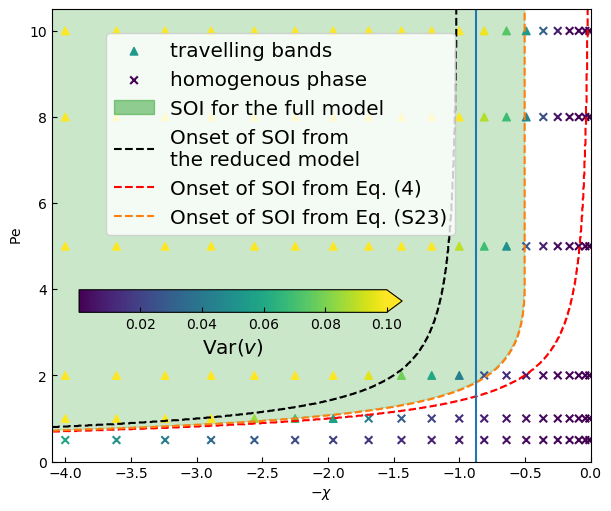

In [15]:
from gsd import fl


root_rudabeh = "/run/user/1148/gvfs/sftp:host=rudabeh002,user=yduan/scratch03.local/yduan"
root_tahmineh = "/run/user/1148/gvfs/sftp:host=tahmineh003,user=yduan/scratch03.local/yduan"
root_sohrab = "/run/user/1148/gvfs/sftp:host=sohrab003,user=yduan/scratch03.local/yduan"


def cal_vel_var(frame_beg=100):
    folder = f"{root_sohrab}/QS_not_inc_self/L20_5_v1_1"
    with open("data/PD_wc_Pe/Dr_etaAB.txt", "r") as f:
        lines = f.readlines()
        
        Dr, eta_AB, vel_var = np.zeros((3, len(lines)))
        state = np.zeros(len(lines), int)
        for j, line in enumerate(lines):
            s = line.rstrip("\n").split(";")
            Dr[j], eta_AB[j], state[j] = float(s[0]), float(s[1]), int(s[2])
            my_Dr = Dr[j]
            my_eta_AB = eta_AB[j]
            fin = f"{folder}/L20_5_Dr{my_Dr:.3f}_r80_e0.000_0.000_J{my_eta_AB:.6f}_-{my_eta_AB:.6f}_h0.250_1000.gsd"
            with fl.open(name=fin, mode="rb") as fgsd:
                s_var_arr = np.zeros(fgsd.nframes - frame_beg)
                for i_frame in range(frame_beg, fgsd.nframes):
                    speeds = fgsd.read_chunk(frame=i_frame, name="particles/charge")
                    s_var_arr[i_frame - frame_beg] = np.var(speeds)
                vel_var[j] = np.mean(s_var_arr)
    
    fout = "data/PD_wc_Pe/Dr_etaAB.npz"
    np.savez_compressed(fout, Dr=Dr, eta_AB=eta_AB, state=state, vel_var=vel_var)


def cal_reduced_lambda(chi, Pe, q2, chi_A=1, chi_B=1, ll=3/20):
    tr0 = 0.5 * (chi_A + chi_B)
    det0 = (chi_A * chi_B - chi) / 4
    Re_lambda_J = tr0 / 2
    Re_lambda_J_square = 1/2 * (tr0**2 - 2 * det0)

    lamb = -q2 * Pe * (Re_lambda_J - ll * q2 * (Re_lambda_J - 1) / 2 + q2 * Pe**2 * Re_lambda_J_square)
    return lamb


def PD_Pe_vs_chi(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(6, 5), constrained_layout=True)
        flag_show = True
    else:
        flag_show = False

    extent, state, q_range = get_PD_wc_Pe_data(1, 1, 1, 1, overwrite=False, resolution=2000, qmax=1, ll=0)
    plot_PD_wc_Pe(state, extent, ax=ax, xlim=[-4.1, 0], ylim=[0, 10.5])
    with np.load("data/PD_wc_Pe/Dr_etaAB.npz", "r") as data:
        Dr, eta_AB, state, vel_var = data["Dr"], data["eta_AB"], data["state"], data["vel_var"]

        vmin, vmax = vel_var.min(), vel_var.max()
        print("val:", vmin, vmax)
        mask_D = state == 1
        mask_H = state == 0
        chi = -eta_AB**2
        Pe = 1 / Dr
        # ax.plot(chi[mask_D], Pe[mask_D], "^")
        # ax.plot(chi[mask_H], Pe[mask_H], "o")
        sca1 = ax.scatter(chi[mask_D], Pe[mask_D], s=30, c=vel_var[mask_D], marker="^", vmin=vmin, vmax=0.1, label="travelling bands")
        sca2 = ax.scatter(chi[mask_H], Pe[mask_H], s=30, c=vel_var[mask_H], marker="x", vmin=vmin, vmax=0.1, label="homogenous phase")

    # ll = 3/20
    # chi = np.linspace(-4.1, -0.1)
    # Pe = np.sqrt(-ll/chi)
    # ax.plot(chi, Pe, "--", c="tab:red", label=r"$-\chi \mathrm{Pe}=\ell^2$")
    reduced_line = onset_instability_reduced_model(ax, q_max=1, ll=0)
    reduced_line2 = onset_instability_Eq4(ax, q_max=1)
    reduced_line3 = onset_instability_Eq_S20(ax, q_max=1)

    cax = ax.inset_axes([0.05, 0.33, 0.6, 0.05])
    cb = plt.colorbar(sca1, extend="max", orientation="horizontal", cax=cax)
    # ax.set_xlabel(r"$\chi$", fontsize="x-large")
    # ax.set_ylabel(r"${\rm Pe}$", fontsize="x-large")
    cb.set_label(r"${\rm Var}(v)$", fontsize="x-large")
    # ax.set_title(r"$\chi_A=\chi_B=1, \sigma=\sigma_v=\sigma_D=1$", fontsize="x-large")

    ax.axvline(-7/8)
    patches = [
            sca1, sca2,
            mpatches.Patch(color='tab:green', label='SOI for the full model', alpha=0.5),
            reduced_line,
            reduced_line2,
            reduced_line3,
            ]
    legend1 = ax.legend(handles=patches, loc=(0.1, 0.5), fontsize="x-large")
    if flag_show:
        plt.xlabel(r"$-\chi$")
        plt.ylabel(r"$\mathrm{Pe}$")

        plt.show()
        # plt.savefig("fig/S1.pdf")
        plt.close()



def onset_instability_reduced_model(ax, q_max=np.sqrt(20/3), ll=3/20):
    chi_A = chi_B = 1

    ncols = nrows = 1000
    x = np.linspace(-4.1, 0, ncols)
    y = np.linspace(0, 10.5, nrows)
    chi, Pe = np.meshgrid(x, y)
    q_max = q_max
    q = np.linspace(0, q_max, 500)


    state = np.zeros((nrows, ncols), int)
    for row in range(nrows):
        for col in range(ncols):
            if 2 * chi[row, col] >= -(chi_A**2 + chi_B**2):
                state[row, col] = 0
            else:
                lamb = cal_reduced_lambda(chi[row, col], Pe[row, col], q**2, ll=ll)
                if lamb.max() > 0:
                    state[row, col] = 1
                else:
                    state[row, col] = 0

    extent=[x[0], x[-1], y[0], y[-1]]
    # plt.imshow(state, origin="lower", extent=extent)
    cts = measure.find_contours(state==1)

    for contour in cts:
        x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
        y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]
        line, = ax.plot(x, y, "k--", label="Onset of SOI from\nthe reduced model")
    return line

def onset_instability_Eq4(ax, q_max=1):
    chi_A = chi_B = 1

    ncols = nrows = 1000
    x = np.linspace(-4.1, 0, ncols)
    y = np.linspace(0, 10.5, nrows)
    chi, Pe = np.meshgrid(x, y)
    q_max = q_max
    q = np.linspace(0, q_max, 500)


    state = np.zeros((nrows, ncols), int)
    mu = 1
    for row in range(nrows):
        for col in range(ncols):
            lamb = -2 * mu - chi[row, col] * Pe[row, col]**2 * q**2
            if lamb.max() > 0:
                state[row, col] = 1
            else:
                state[row, col] = 0

    extent=[x[0], x[-1], y[0], y[-1]]
    # plt.imshow(state, origin="lower", extent=extent)
    cts = measure.find_contours(state==1)

    for contour in cts:
        x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
        y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]
        line, = ax.plot(x, y, "r--", label="Onset of SOI from Eq. (4)")
    return line

def onset_instability_Eq_S20(ax, q_max=1):
    ncols = nrows = 1000
    x = np.linspace(-4.1, 0, ncols)
    y = np.linspace(1e-5, 10.5, nrows)
    chi, Pe = np.meshgrid(x, y)
    q_max = q_max
    q = np.linspace(1e-5, q_max, 500)


    state = np.zeros((nrows, ncols), int)
    mu = 1
    for row in range(nrows):
        for col in range(ncols):
            gamma = 1/(Pe[row, col] * q) + Pe[row, col] * q / 16
            # lamb = -mu/gamma - chi[row, col]/ (2 * gamma * (gamma**2 - 2 * mu))
            # Delta_a = (gamma**2 - 2 * mu)**2 - 4 * chi[row, col]
            # a = np.sqrt(0.5 * (gamma**2 - 2*mu + np.sqrt(Delta_a)))
            # lamb = -(2 * mu * gamma**2 + chi[row, col])
            lamb = -(2*mu + Pe[row, col] **2 * (mu/4 + chi[row, col]) * q**2 + 2*mu * (Pe[row, col] * q)**4/16**2)
            if lamb.max() > 0:
                state[row, col] = 1
            else:
                state[row, col] = 0

    extent=[x[0], x[-1], y[0], y[-1]]
    # plt.imshow(state, origin="lower", extent=extent)
    cts = measure.find_contours(state==1)

    for contour in cts:
        x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
        y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]
        line, = ax.plot(x, y, "--", c="tab:orange", label="Onset of SOI from Eq. (S23)")
    return line

# cal_vel_var()
PD_Pe_vs_chi()

2.581988897471611
[[8.3500e+01 0.0000e+00]
 [8.3500e+01 1.0000e+00]
 [8.3500e+01 2.0000e+00]
 ...
 [1.9970e+03 1.8995e+03]
 [1.9980e+03 1.8995e+03]
 [1.9990e+03 1.8995e+03]]
val: 5.839976049173856e-05 0.2478071002662182


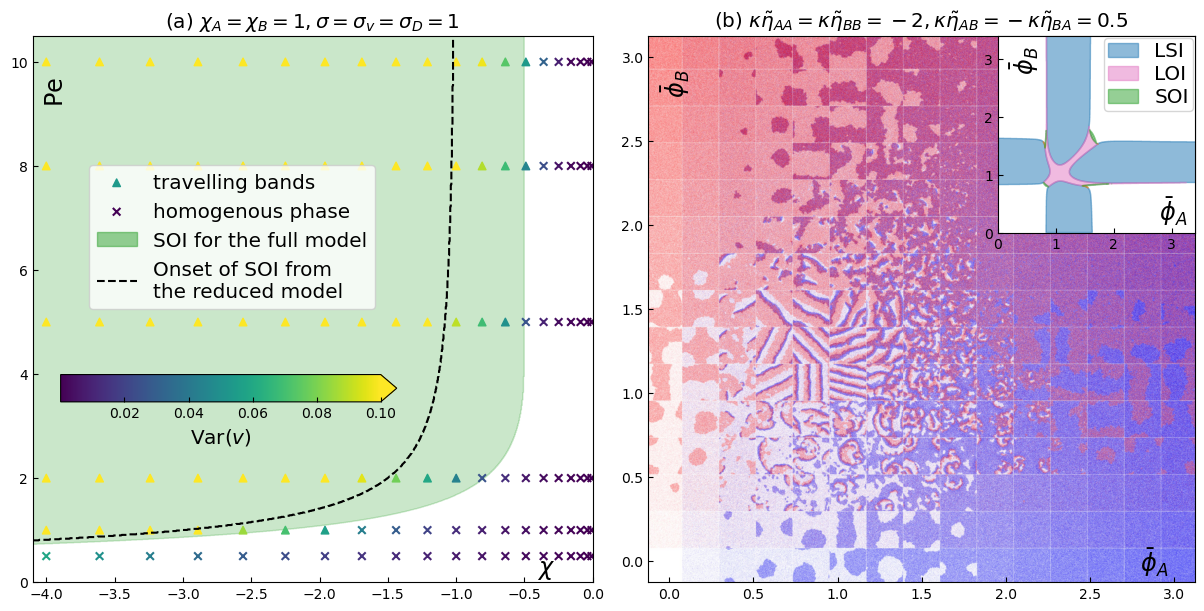

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import os
from gsd import fl
from cal_omega_barV import get_bar_v_omega
from general_PD import find_long_instabi, find_short_instabi, find_contours


root_rudabeh = "/run/user/1148/gvfs/sftp:host=rudabeh002,user=yduan/scratch03.local/yduan"
root_tahmineh = "/run/user/1148/gvfs/sftp:host=tahmineh003,user=yduan/scratch03.local/yduan"
root_sohrab = "/run/user/1148/gvfs/sftp:host=sohrab003,user=yduan/scratch03.local/yduan"



def get_PD_composition_data(etaAA, etaAB, etaBA, etaBB, Dr_A, Dr_B, bar_rho_A, bar_rho_B, bar_vA=1, bar_vB=1, kappa=0.7,
                            extent=[0, 4, 0, 4], qmin=1e-5, qmax=1, Nq=200, resolution=1000, overwrite=False, ll=3./20, simple_gamma=False):
    if simple_gamma:
        folder = "data/PD_pA_pB_SG/"
    elif ll == 0.:
        folder = "data/PD_pA_pB_woS/"
    else:
        folder = "data/PD_pA_pB/"
    fout = "%se%g_%g_%g_%g_D%g_%g_r%g_%g_qm%g_r%g.npz" % (
        folder, etaAA, etaAB, etaBA, etaBB, Dr_A, Dr_B, bar_rho_A, bar_rho_B, qmax, resolution
    )
    if not overwrite and os.path.exists(fout):
        with np.load(fout, "rb") as data:
            return data["extent"], data["state"], data["q_range"]
    else:
        nrows, ncols = resolution, resolution
        pA = np.linspace(extent[0], extent[1], ncols)
        pB = np.linspace(extent[2], extent[3], nrows)
        pA_2D, pB_2D = np.meshgrid(pA, pB)
        vA_0, vB_0, wAA, wAB, wBA, wBB = get_bar_v_omega(
            etaAA, etaAB, etaBA, etaBB, pA_2D, pB_2D, bar_rho_A, bar_rho_B, bar_vA, bar_vB, kappa)
        w1 = 1 + wAA
        w2 = 1 + wBB
        wc = wAB * wBA
        sigma_D = Dr_A / Dr_B
        sigma_v = vA_0 / vB_0
        Pe = vB_0 / Dr_B

        mask_LS, mask_LOI, mask_LSI = find_long_instabi(sigma_D, sigma_v, Pe, w1, w2, wc, q0=qmin, ll=ll, simple_gamma=simple_gamma)
        q0_a4, q0_Delta3 = np.zeros((2, nrows, ncols))
        for row in range(nrows):
            for col in range(ncols):
                if mask_LS[row, col]:
                    q0_a4[row, col], q0_Delta3[row, col] = find_short_instabi(
                        sigma_D, sigma_v[row, col], Pe[row, col], w1[row, col], w2[row, col], wc[row, col], qmin=qmin, qmax=qmax, Nq=Nq, ll=ll, simple_gamma=simple_gamma)
        state = np.zeros((nrows, ncols), dtype=np.byte)
        state[mask_LSI] = 1
        state[mask_LOI] = 2
        state[q0_a4 > 0] = 3
        state[q0_Delta3 > 0] = 4
        q_range = np.array([qmin, qmax, Nq])
        np.savez_compressed(fout, extent=extent, state=state, q_range=q_range)
        return extent, state, q_range


def plot_PD_composition(state, extent, xlim=None, ylim=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(4, 4), constrained_layout=True)
        flag_show = True
    else:
        flag_show = False
    nrows, ncols = state.shape
    contours = find_contours(state)
    for contour in contours["LWS"]:
        x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
        y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]
        # ax.plot(x, y, c="tab:blue", lw=1)
        ax.fill(x, y, c="tab:blue", alpha=0.5)

    for contour in contours["LWO"]:
        x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
        y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]
        # ax.plot(x, y, c="tab:pink", lw=1)
        ax.fill(x, y, c="tab:pink", alpha=0.5)
    
    for contour in contours["SWS"]:
        x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
        y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]
        ax.fill(x, y, c="tab:orange", alpha=0.5)


    for contour in contours["SWO"]:
        x = (contour[:, 1] / ncols) * (extent[1] - extent[0]) + extent[0]
        y = (contour[:, 0] / nrows) * (extent[3] - extent[2]) + extent[2]
        ax.fill(x, y, c="tab:green", alpha=0.5)

    if xlim is None:
        xlim = [extent[0], extent[1]]
    if ylim is None:
        ylim = [extent[2], extent[3]]
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])
    if flag_show:
        plt.show()
        plt.close()


def PD_Pe_vs_chi(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(6, 5), constrained_layout=True)
        flag_show = True
    else:
        flag_show = False

    extent, state, q_range = get_PD_wc_Pe_data(1, 1, 1, 1, overwrite=False, resolution=2000, qmax=1, ll=0)
    plot_PD_wc_Pe(state, extent, ax=ax, xlim=[-4.1, 0], ylim=[0, 10.5])
    with np.load("data/PD_wc_Pe/Dr_etaAB.npz", "r") as data:
        Dr, eta_AB, state, vel_var = data["Dr"], data["eta_AB"], data["state"], data["vel_var"]

        vmin, vmax = vel_var.min(), vel_var.max()
        print("val:", vmin, vmax)
        mask_D = state == 1
        mask_H = state == 0
        chi = -eta_AB**2
        Pe = 1 / Dr
        # ax.plot(chi[mask_D], Pe[mask_D], "^")
        # ax.plot(chi[mask_H], Pe[mask_H], "o")
        sca1 = ax.scatter(chi[mask_D], Pe[mask_D], s=30, c=vel_var[mask_D], marker="^", vmin=vmin, vmax=0.1, label="travelling bands")
        sca2 = ax.scatter(chi[mask_H], Pe[mask_H], s=30, c=vel_var[mask_H], marker="x", vmin=vmin, vmax=0.1, label="homogenous phase")

    # ll = 3/20
    # chi = np.linspace(-4.1, -0.1)
    # Pe = np.sqrt(-ll/chi)
    # ax.plot(chi, Pe, "--", c="tab:red", label=r"$-\chi \mathrm{Pe}=\ell^2$")
    reduced_line = onset_instability_reduced_model(ax, q_max=1, ll=0)
    cax = ax.inset_axes([0.05, 0.33, 0.6, 0.05])
    cb = plt.colorbar(sca1, extend="max", orientation="horizontal", cax=cax)
    # ax.set_xlabel(r"$\chi$", fontsize="x-large")
    # ax.set_ylabel(r"${\rm Pe}$", fontsize="x-large")
    cb.set_label(r"${\rm Var}(v)$", fontsize="x-large")
    # ax.set_title(r"$\chi_A=\chi_B=1, \sigma=\sigma_v=\sigma_D=1$", fontsize="x-large")

    patches = [
            sca1, sca2,
            mpatches.Patch(color='tab:green', label='SOI for the full model', alpha=0.5),
            reduced_line
            ]
    legend1 = ax.legend(handles=patches, loc=(0.1, 0.5), fontsize="x-large")
    if flag_show:
        plt.show()
        # plt.savefig("fig/S1.pdf")
        plt.close()

q_max = np.sqrt(20/3)
print(q_max)
np.pi * 2 / q_max

import matplotlib.patches as mpatches

plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True, width_ratios=[6, 6])

# ax1.set_xticks([])
# ax1.set_yticks([])

###
PD_Pe_vs_chi(ax1)

### ax2
im2 = mpimg.imread("fig/L40_40_Dr0.1_r20_e-2_J0.25.jpeg")
extent = [-0.125, 3.125, -0.125, 3.125]
ax2.imshow(im2, extent=extent)
ax2_in = ax2.inset_axes([0.64, 0.64, 0.36, 0.36])
Dr = 0.1
etaAA = etaBB = -2
etaAB = 0.25
etaBA = -etaAB
extent, state, q_range = get_PD_composition_data(etaAA, etaAB, etaBA, etaBB, Dr, Dr, 1, 1, qmax=2.5, Nq=400, resolution=2000)
plot_PD_composition(state, extent, xlim=[0, 3.4], ylim=[0, 3.4], ax=ax2_in)
ax2_in.set_yticks([0, 1, 2, 3])
# image = mpimg.imread("fig/L40_40_Dr0.1_r20_e-2_J0.50_reduced.jpeg")
# extent = [-0.125, 3.625, -0.125, 3.625]
# ax1.imshow(image, extent=extent)
# ax1.set_xlabel(r"$\phi_A/\rho_0$", fontsize="large")
# ax1.set_ylabel(r"$\phi_B/\rho_0$", fontsize="large")
# load_composition_plane(ax1)
ax1.set_title(r"(a) $\chi_A=\chi_B=1, \sigma=\sigma_v=\sigma_D=1$", fontsize="x-large")
ax2.set_title(r"(b) $\kappa\tilde{\eta}_{AA}=\kappa\tilde{\eta}_{BB}=-2, \kappa\tilde{\eta}_{AB}=-\kappa\tilde{\eta}_{BA}=0.5$", fontsize="x-large")



patches = [mpatches.Patch(color='tab:blue', label='LSI', alpha=0.5),
           mpatches.Patch(color='tab:pink', label='LOI',alpha=0.5),
           mpatches.Patch(color='tab:green', label='SOI', alpha=0.5),
        ]
ax2_in.legend(handles=patches, loc=(0.54, 0.62), fontsize="x-large", borderpad=0.2, labelspacing=0.2, handlelength=1.5)
ax2_in.text(0.82, 0.06, r"$\bar{\phi}_A$", fontsize="xx-large", transform=ax2_in.transAxes)
ax2_in.text(0.05, 0.84, r"$\bar{\phi}_B$", fontsize="xx-large", rotation=90, transform=ax2_in.transAxes)
ax2.text(0.9, 0.02, r"$\bar{\phi}_A$", fontsize="xx-large", transform=ax2.transAxes)
ax2.text(0.02, 0.9, r"$\bar{\phi}_B$", fontsize="xx-large", rotation=90, transform=ax2.transAxes)

ax1.text(0.9, 0.015, r"$\chi$", fontsize="xx-large", transform=ax1.transAxes)
ax1.text(0.02, 0.88, r"$\mathrm{Pe}$", fontsize="xx-large", rotation=90, transform=ax1.transAxes)
# plt.savefig("fig/S1_new.pdf", dpi=200)
plt.show()
plt.close()


[[8.3500e+01 0.0000e+00]
 [8.3500e+01 1.0000e+00]
 [8.3500e+01 2.0000e+00]
 ...
 [1.9970e+03 1.8995e+03]
 [1.9980e+03 1.8995e+03]
 [1.9990e+03 1.8995e+03]]
val: 5.839976049173856e-05 0.2478071002662182


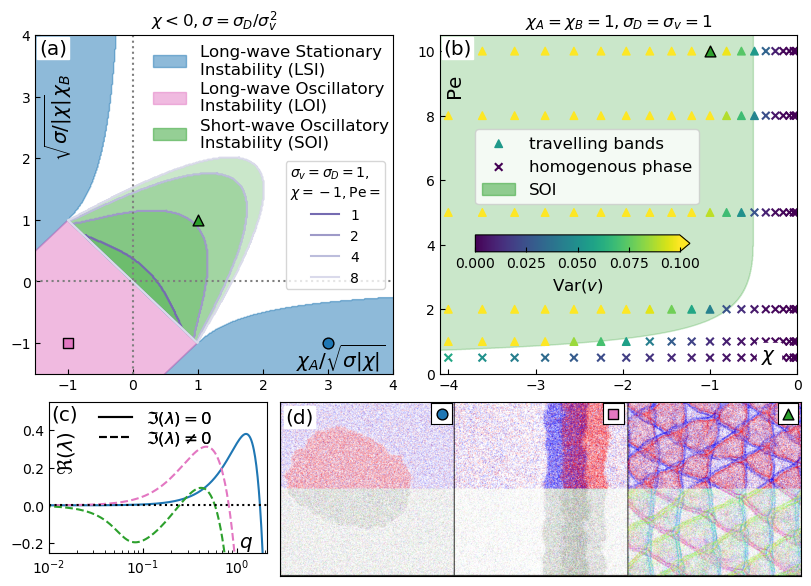

In [17]:
# new FIG1: (a, b) phase diagram on (w1, w2) plane with small and large Pe respectively.
# (c) Typical dispersion relations for four type of instabilities. 
# (d) Typical snapshots
import matplotlib.patches as mpatches
from matplotlib import image as mpimg
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

def PD_Pe_vs_chi(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(6, 5), constrained_layout=True)
        flag_show = True
    else:
        flag_show = False

    extent, state, q_range = get_PD_wc_Pe_data(1, 1, 1, 1, overwrite=False, resolution=2000, qmax=1, ll=0)
    plot_PD_wc_Pe(state, extent, ax=ax, xlim=[-4.1, 0], ylim=[0, 10.5])
    with np.load("data/PD_wc_Pe/Dr_etaAB.npz", "r") as data:
        Dr, eta_AB, state, vel_var = data["Dr"], data["eta_AB"], data["state"], data["vel_var"]

        vmin, vmax = vel_var.min(), vel_var.max()
        print("val:", vmin, vmax)
        vmin = 0
        mask_D = state == 1
        mask_H = state == 0
        chi = -eta_AB**2
        Pe = 1 / Dr
        # ax.plot(chi[mask_D], Pe[mask_D], "^")
        # ax.plot(chi[mask_H], Pe[mask_H], "o")
        sca1 = ax.scatter(chi[mask_D], Pe[mask_D], s=30, c=vel_var[mask_D], marker="^", vmin=vmin, vmax=0.1, label="travelling bands")
        sca2 = ax.scatter(chi[mask_H], Pe[mask_H], s=30, c=vel_var[mask_H], marker="x", vmin=vmin, vmax=0.1, label="homogenous phase")

    # ll = 3/20
    # chi = np.linspace(-4.1, -0.1)
    # Pe = np.sqrt(-ll/chi)
    # ax.plot(chi, Pe, "--", c="tab:red", label=r"$-\chi \mathrm{Pe}=\ell^2$")
    # reduced_line = onset_instability_reduced_model(ax, q_max=1, ll=0)
    cax = ax.inset_axes([0.1, 0.36, 0.6, 0.05])
    cb = plt.colorbar(sca1, extend="max", orientation="horizontal", cax=cax)
    # ax.set_xlabel(r"$\chi$", fontsize="x-large")
    # ax.set_ylabel(r"${\rm Pe}$", fontsize="x-large")
    cb.set_label(r"${\rm Var}(v)$", fontsize="large")
    # ax.set_title(r"$\chi_A=\chi_B=1, \sigma=\sigma_v=\sigma_D=1$", fontsize="x-large")

    patches = [
            sca1, sca2,
            mpatches.Patch(color='tab:green', label='SOI', alpha=0.5),
            # reduced_line
            ]
    legend1 = ax.legend(handles=patches, loc=(0.1, 0.5), fontsize="large")
    if flag_show:
        plt.show()
        # plt.savefig("fig/S1.pdf")
        plt.close()

fig = plt.figure(constrained_layout=True, figsize=(8, 5.75))
subfigs = fig.subfigures(2, 1, wspace=0.001, hspace=0.002, height_ratios=[3, 1.4])
(ax1, ax2) = subfigs[0].subplots(1, 2)

# (ax3, ax4) = subfigs[1].subplots(1, 2, width_ratios=[1, 3])
(subfig3, subfig4) = subfigs[1].subfigures(1, 2, wspace=0.01, width_ratios=[1, 2])
# ax3 = subfig3.add_subplot(1, 2, 1)
ax3 = subfig3.subplots()
ax4 = subfig4.subplots()
xlim = [-1.5, 4]
ylim = [-1.5, 4]

label_font_size = "x-large"
# plot_PD_rho_eq_w1_w2(ax1, xmin=xlim[0], xmax=xlim[1], ymin=ylim[0], ymax=ylim[1], loc_line_legend=(0.35, 0.43), loc_fill_legend=(0.41, 0.2), legend_font_size="medium")

xlabel = r"$\chi_A/\sqrt{\sigma|\chi|}$"
ylabel = r"$\sqrt{\sigma / |\chi|}\chi_B$"
# ax1.set_xlabel(xlabel, fontsize=label_font_size)
# ax1.set_ylabel(ylabel, fontsize=label_font_size)

Pe = 1
sigma_D=1
sigma_v = 1
wc = -1
extent, state, q_range = get_PD_tilde_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2.5, Nq=500, resolution=1000)
x, y = plot_PD_tilde_w1_w2(state, extent, xlim, ylim, ax=ax1, legend_loc=(0.28, 0.68), legend_font_size="medium")
# mask = x + y > 0.0001
# x = x[mask]
# y = y[mask]
cm = plt.cm.get_cmap('tab20c')
line, = ax1.plot(x, y, "-", c=cm.colors[12], label="%g" % Pe)
line_list = [line]
for i, Pe in enumerate([2, 4, 8]):
    extent, state, q_range = get_PD_tilde_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2.5, Nq=500, resolution=1000)
    x, y = plot_PD_tilde_w1_w2(state, extent, xlim, ylim, ax=ax1, only_SWO=True)
    line, = ax1.plot(x, y, c=cm.colors[i+13], label="%g" % Pe)
    line_list.append(line)
# ax2.set_xlabel(xlabel, fontsize=label_font_size)

PD_Pe_vs_chi(ax2)

# ax2.legend()
ax1.axhline(0, linestyle=":", color="tab:grey")
ax1.axvline(0, linestyle=":", color="tab:grey")
line_legend = ax1.legend(handles=line_list, title="$\sigma_v=\sigma_D=1,$\n$\\chi=-1,{\\rm Pe}=$", loc=(0.7, 0.25), fontsize="medium", borderpad=0.3)
ax1.add_artist(line_legend)

# ax2_in = ax2.inset_axes([0.13, 0.08, 0.32, 0.32])
# ax2_in = ax2.inset_axes([0.685, 0.63, 0.3, 0.3])

# extent, state, q_range = get_PD_wc_Pe_data(1, 1, 1, 1, overwrite=False)
# plot_PD_wc_Pe(state, extent, ax=ax2_in, xlim=[-4, 0], ylim=[0, 11])
# ax2_in.set_xticks([-4, -2, 0])
# ax2_in.set_yticks([0, 5, 10])
# ax2_in.set_title(r"$\chi_{A,B}=1$")
# ax2_in.text(0.85, 0.08, r"$\chi$", transform=ax2_in.transAxes, fontsize="large")
# ax2_in.text(0.05, 0.75, r"${\rm Pe}$", transform=ax2_in.transAxes, rotation='vertical', fontsize="large")
# ax2_in.plot(-0.8**2, 10, "o", ms=1)
# ax2_in.plot(-0.8**2, 1, "o", ms=1)
# ax2_in.plot(-0.5**2, 10, "o", ms=1)
ax2.scatter(-1, 10, s=60, c="tab:green", marker="^", edgecolors="k", zorder=2.5)
# with open("data/PD_wc_Pe/Dr_etaAB.txt", "r") as f:
#     lines = f.readlines()
#     for line in lines:
#         s = line.rstrip("\n").split(";")
#         Dr, eta_AB, state = float(s[0]), float(s[1]), int(s[2])
#         if state == 1:
#             ax2_in.plot(-eta_AB**2, 1/Dr, "^", c="tab:green", ms=3, fillstyle="none")
#         else:
#             ax2_in.plot(-eta_AB**2, 1/Dr, "x", c="tab:grey", ms=3)

### ax3E
from NRQS_Turing import DMatrix_w_surface_tension
# ax3.set_xlabel(r"$q$", fontsize=label_font_size, labelpad=0.5)
# ax3.set_ylabel(r"$\Re(\lambda)$", fontsize=label_font_size)

# q_arr = np.linspace(1e-6, np.sqrt(20/3), 1000)
q_arr = np.logspace(-4, np.log10(np.sqrt(20/3)), 1000, endpoint=False)

M1 = DMatrix_w_surface_tension(1, -3.125, 0.32, -2.2, phiA=1, phiB=1, Dr_A=6, Dr_B=6, bar_vA=3, bar_vB=1)
M2 = DMatrix_w_surface_tension(-0.2, -3.125, 0.32, -2.21, phiA=1, phiB=1, Dr_A=6, Dr_B=6, bar_vA=3, bar_vB=1)
# M2 = DMatrix_w_surface_tension(-0.21, -3.125, 0.32, -2.25, phiA=1, phiB=1, Dr_A=6, Dr_B=6, bar_vA=3, bar_vB=1)

M3 = DMatrix_w_surface_tension(-1.1, 0.08, -0.125, -1.1, phiA=1, phiB=1, Dr_A=0.1, Dr_B=0.1, bar_vA=1, bar_vB=1)
M4 = DMatrix_w_surface_tension(0, 0.8, -0.8, 0, phiA=1, phiB=1, Dr_A=0.1, Dr_B=0.1, bar_vA=1, bar_vB=1)
c_list = ["tab:blue", "tab:pink", "tab:green"]
M_list = [M1, M3, M4]
scale_factor = np.array([0.08, 0.1, 0.1]) * 100
for i, M in enumerate(M_list):
    lamb = M.get_lambda_q(q_arr).max(axis=1)
    mask_r = np.abs(lamb.imag) <= 1e-8
    mask_i = mask_r == False

    line, = ax3.plot(q_arr[mask_r], lamb[mask_r].real * scale_factor[i], c=c_list[i])
    ax3.plot(q_arr[mask_i], lamb[mask_i].real * scale_factor[i], c=line.get_c(), linestyle="dashed")
    # line, = plt.plot(q_arr, np.abs(lamb.imag) * Dr[i], c=c_list[i])

line1 = ax3.axhline(-100, linestyle="-", c="k", label=r"$\Im(\lambda)=0$")
line2 = ax3.axhline(-100, linestyle="--", c="k", label=r"$\Im(\lambda)\neq 0$")
legend1 = ax3.legend(handles=[line1, line2], fontsize="large", loc=(0.2, 0.65), frameon=False, labelspacing=0.1)
ax3.add_artist(legend1)
patches = [mpatches.Patch(color='tab:blue', label='Long-wave Stationary\nInstability (LSI)', alpha=0.5),
           mpatches.Patch(color='tab:pink', label='Long-wave Oscillatory\nInstability (LOI)',alpha=0.5),
        #    mpatches.Patch(color='tab:orange', label='Short-wave\nStationary\nInstability (SSI)', alpha=0.5),
           mpatches.Patch(color='tab:green', label='Short-wave Oscillatory\nInstability (SOI)', alpha=0.5),
        ]
legend2 = ax1.legend(handles=patches, loc=(0.31, 0.64), fontsize="large", frameon=False, labelspacing=0.25)


ax3.set_xscale("log")
ax3.set_xlim(1e-2, 2.1)
ax3.set_ylim(-0.25, 0.55)
ax3.axhline(0, linestyle=":", c="k")
ax3.set_yticks([-0.2, 0, 0.2, 0.4])
### ax4
im = mpimg.imread("/home/yduan/Desktop/NRQS1_Fig/fig1/snap_1_3_w_theta.png")
ax4.imshow(im)
ax4.set_yticks([])
ax4.set_xticks([])

ax4_in0 = ax4.inset_axes([0.29, 0.87, 0.04, 0.12])
ax4_in0.set_xticks([])
ax4_in0.set_yticks([])
ax4_in0.scatter(0.4, 0.5, s=60, c="tab:blue", marker="o", edgecolors="k")
ax1.scatter(3, -1, s=60, c="tab:blue", marker="o", edgecolors="k")


# ax4_in0 = ax4.inset_axes([0.92, 0.92, 0.08, 0.08])
# ax4_in0.set_xticks([])
# ax4_in0.set_yticks([])
# ax4_in0.scatter(0.4, 0.5, s=60, c="tab:orange", marker="p", edgecolors="k")
# ax1.scatter(1.245, -0.18, s=60, c="tab:orange", marker="p", edgecolors="k", zorder=2.5)


ax4_in0 = ax4.inset_axes([0.62, 0.87, 0.04, 0.12])
ax4_in0.set_xticks([])
ax4_in0.set_yticks([])
ax4_in0.scatter(0.4, 0.5, s=60, c="tab:pink", marker="s", edgecolors="k")
ax1.scatter(-1, -1, s=60, c="tab:pink", marker="s", edgecolors="k")

ax4_in0 = ax4.inset_axes([0.955, 0.87, 0.04, 0.12])
ax4_in0.set_xticks([])
ax4_in0.set_yticks([])
ax4_in0.scatter(0.4, 0.5, s=60, c="tab:green", marker="^", edgecolors="k")
ax1.scatter(1, 1, s=60, c="tab:green", marker="^", edgecolors="k", zorder=2.5)

# ax4.arrow(0.25, 0.25, -0.1, 0, transform=ax4.transAxes, width=0.01)

ax1.set_title(r"$\chi<0, \sigma=\sigma_D/\sigma_v^2$", fontsize="large")
ax2.set_title("$\chi_A=\chi_B=1, \sigma_D=\sigma_v=1$", fontsize="large")
# ax3.set_title("(c)", fontsize="large")
# ax4.set_title("(d)", fontsize="large")

# ax3.text(-0.4, 0.48, r"$\Re (\lambda)$", rotation='vertical', fontsize=label_font_size)

# subfig4.text(0.7, 0.99, xlabel, fontsize=label_font_size)
# subfig4.text(0.03, 0.99, xlabel, fontsize=label_font_size)
# subfig3.text(0.7, 0.02, r"$q$", fontsize=label_font_size)
# ax3.legend(fontsize="large", handletextpad=0.1, loc=(0.05, 0.1), labelspacing=0.1, borderpad=0.2)
ax3.text(0.03, 0.55, r"$\Re(\lambda)$", rotation=90, transform=ax3.transAxes, fontsize=label_font_size)
ax3.text(0.87, 0.035, r"$q$", rotation=0, transform=ax3.transAxes, fontsize=label_font_size)

ax1.text(0.02, 0.65, ylabel, rotation=90, transform=ax1.transAxes, fontsize=label_font_size)
ax1.text(0.73, 0.02, xlabel, rotation=0, transform=ax1.transAxes, fontsize=label_font_size)
ax2.text(0.02, 0.82, r"${\rm Pe}$", rotation=90, transform=ax2.transAxes, fontsize=label_font_size)


# ax1.text(0.02, 0.75, r"$\tilde{\omega}_2$", rotation=90, transform=ax1.transAxes, fontsize=label_font_size)

bbox=dict(edgecolor="w", facecolor="w", boxstyle="Square, pad=0.08")
ax1.text(0.01, 0.945, "(a)", fontsize="x-large", transform=ax1.transAxes, backgroundcolor="w", bbox=bbox)
ax2.text(0.01, 0.945, "(b)", fontsize="x-large", transform=ax2.transAxes, backgroundcolor="w", bbox=bbox)
ax3.text(0.01, 0.88, "(c)", fontsize="x-large", transform=ax3.transAxes)

ax4.text(0.01, 0.88, "(d)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)


bbox=dict(edgecolor="w", facecolor="w", boxstyle="Square, pad=0.2")
ax2.text(0.9, 0.04, r"$\chi$", rotation=0, transform=ax2.transAxes, fontsize=label_font_size, backgroundcolor="w", bbox=bbox)


# ax4.text(0.02, 0.4375, "(f)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)
# ax4.text(0.51, 0.935, "(e)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)
# ax4.text(0.51, 0.4375, "(g)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)
# ax4.text(0.508, 0.935, "(h)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)

# ax4.text(0.008, 0.935, "(h)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=dict(edgecolor="w", facecolor="w", boxstyle="Square, pad=0.08"))

plt.show()
# plt.savefig("fig/f1.pdf", dpi=200)
plt.close()

[[8.3500e+01 0.0000e+00]
 [8.3500e+01 1.0000e+00]
 [8.3500e+01 2.0000e+00]
 ...
 [1.9970e+03 1.8995e+03]
 [1.9980e+03 1.8995e+03]
 [1.9990e+03 1.8995e+03]]
val: 5.839976049173856e-05 0.2478071002662182


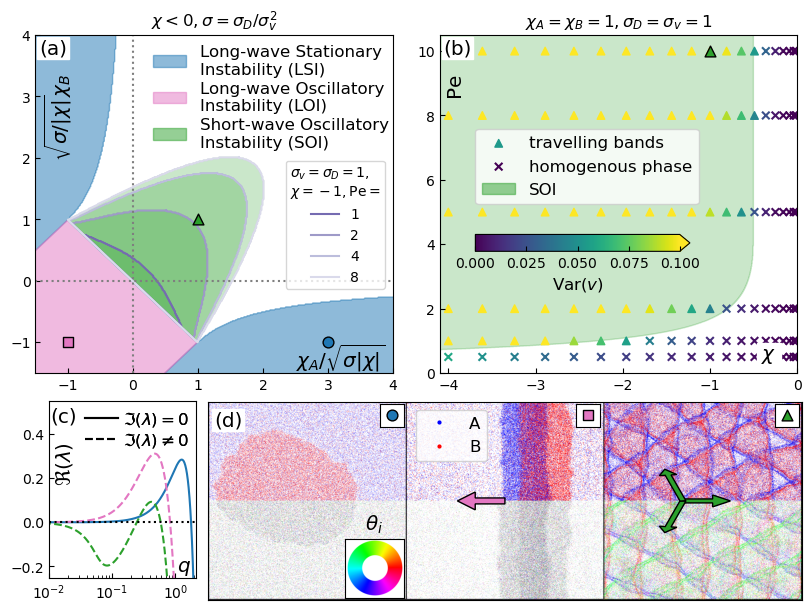

In [18]:
# new FIG1: (a, b) phase diagram on (w1, w2) plane with small and large Pe respectively.
# (c) Typical dispersion relations for four type of instabilities. 
# (d) Typical snapshots
import matplotlib.patches as mpatches
from matplotlib import image as mpimg
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

def PD_Pe_vs_chi(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(6, 5), constrained_layout=True)
        flag_show = True
    else:
        flag_show = False

    extent, state, q_range = get_PD_wc_Pe_data(1, 1, 1, 1, overwrite=False, resolution=2000, qmax=1, ll=0)
    plot_PD_wc_Pe(state, extent, ax=ax, xlim=[-4.1, 0], ylim=[0, 10.5])
    with np.load("data/PD_wc_Pe/Dr_etaAB.npz", "r") as data:
        Dr, eta_AB, state, vel_var = data["Dr"], data["eta_AB"], data["state"], data["vel_var"]

        vmin, vmax = vel_var.min(), vel_var.max()
        print("val:", vmin, vmax)
        vmin = 0
        mask_D = state == 1
        mask_H = state == 0
        chi = -eta_AB**2
        Pe = 1 / Dr
        # ax.plot(chi[mask_D], Pe[mask_D], "^")
        # ax.plot(chi[mask_H], Pe[mask_H], "o")
        sca1 = ax.scatter(chi[mask_D], Pe[mask_D], s=30, c=vel_var[mask_D], marker="^", vmin=vmin, vmax=0.1, label="travelling bands")
        sca2 = ax.scatter(chi[mask_H], Pe[mask_H], s=30, c=vel_var[mask_H], marker="x", vmin=vmin, vmax=0.1, label="homogenous phase")

    # ll = 3/20
    # chi = np.linspace(-4.1, -0.1)
    # Pe = np.sqrt(-ll/chi)
    # ax.plot(chi, Pe, "--", c="tab:red", label=r"$-\chi \mathrm{Pe}=\ell^2$")
    # reduced_line = onset_instability_reduced_model(ax, q_max=1, ll=0)
    cax = ax.inset_axes([0.1, 0.36, 0.6, 0.05])
    cb = plt.colorbar(sca1, extend="max", orientation="horizontal", cax=cax)
    # ax.set_xlabel(r"$\chi$", fontsize="x-large")
    # ax.set_ylabel(r"${\rm Pe}$", fontsize="x-large")
    cb.set_label(r"${\rm Var}(v)$", fontsize="large")
    # ax.set_title(r"$\chi_A=\chi_B=1, \sigma=\sigma_v=\sigma_D=1$", fontsize="x-large")

    patches = [
            sca1, sca2,
            mpatches.Patch(color='tab:green', label='SOI', alpha=0.5),
            # reduced_line
            ]
    legend1 = ax.legend(handles=patches, loc=(0.1, 0.5), fontsize="large")
    if flag_show:
        plt.show()
        # plt.savefig("fig/S1.pdf")
        plt.close()

fig = plt.figure(constrained_layout=True, figsize=(8, 6))
subfigs = fig.subfigures(2, 1, wspace=0.001, hspace=0.002, height_ratios=[3, 1.6])
(ax1, ax2) = subfigs[0].subplots(1, 2)

# (ax3, ax4) = subfigs[1].subplots(1, 2, width_ratios=[1, 3])
(subfig3, subfig4) = subfigs[1].subfigures(1, 2, wspace=0.01, width_ratios=[1, 3.1])
# ax3 = subfig3.add_subplot(1, 2, 1)
ax3 = subfig3.subplots()
ax4 = subfig4.subplots()
xlim = [-1.5, 4]
ylim = [-1.5, 4]

label_font_size = "x-large"
# plot_PD_rho_eq_w1_w2(ax1, xmin=xlim[0], xmax=xlim[1], ymin=ylim[0], ymax=ylim[1], loc_line_legend=(0.35, 0.43), loc_fill_legend=(0.41, 0.2), legend_font_size="medium")

xlabel = r"$\chi_A/\sqrt{\sigma|\chi|}$"
ylabel = r"$\sqrt{\sigma / |\chi|}\chi_B$"
# ax1.set_xlabel(xlabel, fontsize=label_font_size)
# ax1.set_ylabel(ylabel, fontsize=label_font_size)

Pe = 1
sigma_D=1
sigma_v = 1
wc = -1
extent, state, q_range = get_PD_tilde_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2.5, Nq=500, resolution=1000)
x, y = plot_PD_tilde_w1_w2(state, extent, xlim, ylim, ax=ax1, legend_loc=(0.28, 0.68), legend_font_size="medium")
# mask = x + y > 0.0001
# x = x[mask]
# y = y[mask]
cm = plt.cm.get_cmap('tab20c')
line, = ax1.plot(x, y, "-", c=cm.colors[12], label="%g" % Pe)
line_list = [line]
for i, Pe in enumerate([2, 4, 8]):
    extent, state, q_range = get_PD_tilde_w1_w2_data(sigma_D, sigma_v, Pe, wc, qmax=2.5, Nq=500, resolution=1000)
    x, y = plot_PD_tilde_w1_w2(state, extent, xlim, ylim, ax=ax1, only_SWO=True)
    line, = ax1.plot(x, y, c=cm.colors[i+13], label="%g" % Pe)
    line_list.append(line)
# ax2.set_xlabel(xlabel, fontsize=label_font_size)

PD_Pe_vs_chi(ax2)

# ax2.legend()
ax1.axhline(0, linestyle=":", color="tab:grey")
ax1.axvline(0, linestyle=":", color="tab:grey")
line_legend = ax1.legend(handles=line_list, title="$\sigma_v=\sigma_D=1,$\n$\\chi=-1,{\\rm Pe}=$", loc=(0.7, 0.25), fontsize="medium", borderpad=0.3)
ax1.add_artist(line_legend)

# ax2_in = ax2.inset_axes([0.13, 0.08, 0.32, 0.32])
# ax2_in = ax2.inset_axes([0.685, 0.63, 0.3, 0.3])

# extent, state, q_range = get_PD_wc_Pe_data(1, 1, 1, 1, overwrite=False)
# plot_PD_wc_Pe(state, extent, ax=ax2_in, xlim=[-4, 0], ylim=[0, 11])
# ax2_in.set_xticks([-4, -2, 0])
# ax2_in.set_yticks([0, 5, 10])
# ax2_in.set_title(r"$\chi_{A,B}=1$")
# ax2_in.text(0.85, 0.08, r"$\chi$", transform=ax2_in.transAxes, fontsize="large")
# ax2_in.text(0.05, 0.75, r"${\rm Pe}$", transform=ax2_in.transAxes, rotation='vertical', fontsize="large")
# ax2_in.plot(-0.8**2, 10, "o", ms=1)
# ax2_in.plot(-0.8**2, 1, "o", ms=1)
# ax2_in.plot(-0.5**2, 10, "o", ms=1)
ax2.scatter(-1, 10, s=60, c="tab:green", marker="^", edgecolors="k", zorder=2.5)
# with open("data/PD_wc_Pe/Dr_etaAB.txt", "r") as f:
#     lines = f.readlines()
#     for line in lines:
#         s = line.rstrip("\n").split(";")
#         Dr, eta_AB, state = float(s[0]), float(s[1]), int(s[2])
#         if state == 1:
#             ax2_in.plot(-eta_AB**2, 1/Dr, "^", c="tab:green", ms=3, fillstyle="none")
#         else:
#             ax2_in.plot(-eta_AB**2, 1/Dr, "x", c="tab:grey", ms=3)

### ax3E
from NRQS_Turing import DMatrix_w_surface_tension
# ax3.set_xlabel(r"$q$", fontsize=label_font_size, labelpad=0.5)
# ax3.set_ylabel(r"$\Re(\lambda)$", fontsize=label_font_size)

# q_arr = np.linspace(1e-6, np.sqrt(20/3), 1000)
q_arr = np.logspace(-4, np.log10(np.sqrt(20/3)), 1000, endpoint=False)

M1 = DMatrix_w_surface_tension(1, -3.125, 0.32, -2.2, phiA=1, phiB=1, Dr_A=6, Dr_B=6, bar_vA=3, bar_vB=1)
M2 = DMatrix_w_surface_tension(-0.2, -3.125, 0.32, -2.21, phiA=1, phiB=1, Dr_A=6, Dr_B=6, bar_vA=3, bar_vB=1)
# M2 = DMatrix_w_surface_tension(-0.21, -3.125, 0.32, -2.25, phiA=1, phiB=1, Dr_A=6, Dr_B=6, bar_vA=3, bar_vB=1)

M3 = DMatrix_w_surface_tension(-1.1, 0.08, -0.125, -1.1, phiA=1, phiB=1, Dr_A=0.1, Dr_B=0.1, bar_vA=1, bar_vB=1)
M4 = DMatrix_w_surface_tension(0, 0.8, -0.8, 0, phiA=1, phiB=1, Dr_A=0.1, Dr_B=0.1, bar_vA=1, bar_vB=1)
c_list = ["tab:blue", "tab:pink", "tab:green"]
M_list = [M1, M3, M4]
scale_factor = np.array([0.06, 0.1, 0.1]) * 100
for i, M in enumerate(M_list):
    lamb = M.get_lambda_q(q_arr).max(axis=1)
    mask_r = np.abs(lamb.imag) <= 1e-8
    mask_i = mask_r == False

    line, = ax3.plot(q_arr[mask_r], lamb[mask_r].real * scale_factor[i], c=c_list[i])
    ax3.plot(q_arr[mask_i], lamb[mask_i].real * scale_factor[i], c=line.get_c(), linestyle="dashed")
    # line, = plt.plot(q_arr, np.abs(lamb.imag) * Dr[i], c=c_list[i])

line1 = ax3.axhline(-100, linestyle="-", c="k", label=r"$\Im(\lambda)=0$")
line2 = ax3.axhline(-100, linestyle="--", c="k", label=r"$\Im(\lambda)\neq 0$")
legend1 = ax3.legend(handles=[line1, line2], fontsize="large", loc=(0.2, 0.69), frameon=False, labelspacing=0.08, handletextpad=0.3)
ax3.add_artist(legend1)
patches = [mpatches.Patch(color='tab:blue', label='Long-wave Stationary\nInstability (LSI)', alpha=0.5),
           mpatches.Patch(color='tab:pink', label='Long-wave Oscillatory\nInstability (LOI)',alpha=0.5),
        #    mpatches.Patch(color='tab:orange', label='Short-wave\nStationary\nInstability (SSI)', alpha=0.5),
           mpatches.Patch(color='tab:green', label='Short-wave Oscillatory\nInstability (SOI)', alpha=0.5),
        ]
legend2 = ax1.legend(handles=patches, loc=(0.31, 0.64), fontsize="large", frameon=False, labelspacing=0.25)


ax3.set_xscale("log")
ax3.set_xlim(1e-2, 2.1)
ax3.set_ylim(-0.25, 0.55)
ax3.axhline(0, linestyle=":", c="k")
ax3.set_yticks([-0.2, 0, 0.2, 0.4])
### ax4
im = mpimg.imread("/home/yduan/Desktop/NRQS1_Fig/fig1/snap_1_3_w_theta_r.png")
ax4.imshow(im)
ax4.set_yticks([])
ax4.set_xticks([])


ax4_cb = ax4.inset_axes([0.23, 0.01, 0.1, 0.3])
im = mpimg.imread("/home/yduan/Desktop/NRQS1_Fig/fig1/circle2.png")
ax4_cb.set_title(r"$\theta_i$", fontsize="x-large")
ax4_cb.imshow(im)
ax4_cb.set_xticks([])
ax4_cb.set_yticks([])

ax4_in0 = ax4.inset_axes([0.29, 0.87, 0.04, 0.12])
ax4_in0.set_xticks([])
ax4_in0.set_yticks([])
ax4_in0.scatter(0.4, 0.5, s=60, c="tab:blue", marker="o", edgecolors="k")
ax1.scatter(3, -1, s=60, c="tab:blue", marker="o", edgecolors="k")


# ax4_in0 = ax4.inset_axes([0.92, 0.92, 0.08, 0.08])
# ax4_in0.set_xticks([])
# ax4_in0.set_yticks([])
# ax4_in0.scatter(0.4, 0.5, s=60, c="tab:orange", marker="p", edgecolors="k")
# ax1.scatter(1.245, -0.18, s=60, c="tab:orange", marker="p", edgecolors="k", zorder=2.5)


ax4_in0 = ax4.inset_axes([0.62, 0.87, 0.04, 0.12])
ax4_in0.set_xticks([])
ax4_in0.set_yticks([])
ax4_in0.scatter(0.4, 0.5, s=60, c="tab:pink", marker="s", edgecolors="k")
ax1.scatter(-1, -1, s=60, c="tab:pink", marker="s", edgecolors="k")

ax4_in0 = ax4.inset_axes([0.955, 0.87, 0.04, 0.12])
ax4_in0.set_xticks([])
ax4_in0.set_yticks([])
ax4_in0.scatter(0.4, 0.5, s=60, c="tab:green", marker="^", edgecolors="k")
ax1.scatter(1, 1, s=60, c="tab:green", marker="^", edgecolors="k", zorder=2.5)

# ax4.arrow(0.25, 0.25, -0.1, 0, transform=ax4.transAxes, width=0.01)
import matplotlib.lines as mlines
blue_circle = mlines.Line2D([], [], color="blue", marker="o", markersize=2, label="A", lw=0)
red_circle = mlines.Line2D([], [], color="red", marker="o", markersize=2, label="B", lw=0)
ax4.legend(handles=[blue_circle, red_circle], loc=(0.35, 0.7), fontsize="large")

ax4.arrow(0.5, 0.5, -0.05, 0, transform=ax4.transAxes, width=0.03, color="tab:pink", ec="k", head_length=0.03)
# ax4.arrow(0.78, 0.28, 0.05, 0, transform=ax4.transAxes, width=0.008)
# ax4.arrow(0.79, 0.28, 0.05, 0, transform=ax4.transAxes, width=0.008)
ax4.arrow(0.80, 0.5, 0.05, 0, transform=ax4.transAxes, width=0.02, color="tab:green", ec="k", head_length=0.03)
ax4.arrow(0.80, 0.5, 0.05 * np.cos(-np.pi * 2 / 3), 0.05 * np.sin(-np.pi * 2 / 3) * 3, transform=ax4.transAxes, width=0.01, color="tab:green", ec="k", head_length=0.03)
ax4.arrow(0.80, 0.5, 0.05 * np.cos(np.pi * 2 / 3), 0.05 * np.sin(np.pi * 2 / 3) * 3, transform=ax4.transAxes, width=0.01, color="tab:green", ec="k", head_length=0.03)

ax1.set_title(r"$\chi<0, \sigma=\sigma_D/\sigma_v^2$", fontsize="large")
ax2.set_title("$\chi_A=\chi_B=1, \sigma_D=\sigma_v=1$", fontsize="large")
# ax3.set_title("(c)", fontsize="large")
# ax4.set_title("(d)", fontsize="large")

# ax3.text(-0.4, 0.48, r"$\Re (\lambda)$", rotation='vertical', fontsize=label_font_size)

# subfig4.text(0.7, 0.99, xlabel, fontsize=label_font_size)
# subfig4.text(0.03, 0.99, xlabel, fontsize=label_font_size)
# subfig3.text(0.7, 0.02, r"$q$", fontsize=label_font_size)
# ax3.legend(fontsize="large", handletextpad=0.1, loc=(0.05, 0.1), labelspacing=0.1, borderpad=0.2)
ax3.text(0.03, 0.55, r"$\Re(\lambda)$", rotation=90, transform=ax3.transAxes, fontsize=label_font_size)
ax3.text(0.87, 0.035, r"$q$", rotation=0, transform=ax3.transAxes, fontsize=label_font_size)

ax1.text(0.02, 0.65, ylabel, rotation=90, transform=ax1.transAxes, fontsize=label_font_size)
ax1.text(0.73, 0.02, xlabel, rotation=0, transform=ax1.transAxes, fontsize=label_font_size)
ax2.text(0.02, 0.82, r"${\rm Pe}$", rotation=90, transform=ax2.transAxes, fontsize=label_font_size)


# ax1.text(0.02, 0.75, r"$\tilde{\omega}_2$", rotation=90, transform=ax1.transAxes, fontsize=label_font_size)

bbox=dict(edgecolor="w", facecolor="w", boxstyle="Square, pad=0.08")
ax1.text(0.01, 0.945, "(a)", fontsize="x-large", transform=ax1.transAxes, backgroundcolor="w", bbox=bbox)
ax2.text(0.01, 0.945, "(b)", fontsize="x-large", transform=ax2.transAxes, backgroundcolor="w", bbox=bbox)
ax3.text(0.01, 0.88, "(c)", fontsize="x-large", transform=ax3.transAxes)

ax4.text(0.01, 0.88, "(d)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)


bbox=dict(edgecolor="w", facecolor="w", boxstyle="Square, pad=0.2")
ax2.text(0.9, 0.04, r"$\chi$", rotation=0, transform=ax2.transAxes, fontsize=label_font_size, backgroundcolor="w", bbox=bbox)


# ax4.text(0.02, 0.4375, "(f)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)
# ax4.text(0.51, 0.935, "(e)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)
# ax4.text(0.51, 0.4375, "(g)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)
# ax4.text(0.508, 0.935, "(h)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=bbox)

# ax4.text(0.008, 0.935, "(h)", fontsize="x-large", transform=ax4.transAxes, backgroundcolor="w", bbox=dict(edgecolor="w", facecolor="w", boxstyle="Square, pad=0.08"))

plt.show()
# plt.savefig("fig/f1.pdf", dpi=200)
plt.close()

sigma=0.694444


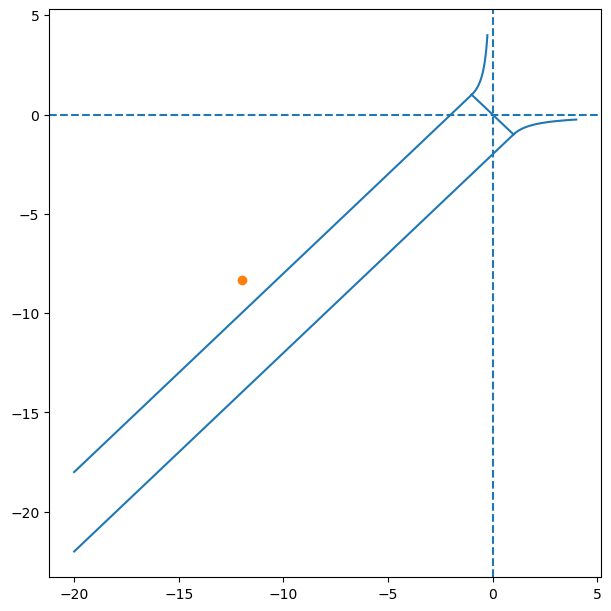

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def get_chi_A_tilde(eta_AA, sigma, chi):
    return (1+eta_AA)/np.sqrt(sigma * np.abs(chi))

def get_chi_B_tilde(eta_BB, sigma, chi):
    return (1+eta_BB)*np.sqrt(sigma/np.abs(chi))

fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)
x = np.linspace(-20, 1)
line, = ax.plot(x, x-2)
x = np.linspace(-20, -1)
ax.plot(x, x+2, c=line.get_c())
x = np.linspace(-1, 1)
ax.plot(x, -x, c=line.get_c())

x = np.linspace(1, 4)
ax.plot(x, -1/x, c=line.get_c())
y = np.linspace(1, 4)
ax.plot(-1/y, y, c=line.get_c())

vA = 1.2
sigma = 1 / vA ** 2
print("sigma=%g" % sigma)
chi = -0.1**2
eta_AA = -2
eta_BB = -2
chi_A = get_chi_A_tilde(eta_AA, sigma, chi)
chi_B = get_chi_B_tilde(eta_BB, sigma, chi)
ax.plot(chi_A, chi_B, "o")

ax.axhline(0, linestyle="dashed")
ax.axvline(0, linestyle="dashed")

plt.show()
plt.close()